# UOA MS DS COURSE 2 - DATA MINING AND DISCOVERY
# Assignment Uber Supply-Demand Gap

## Uber Business Problem

### the aim of the analysis is to identify the root cause of the problem (i.e. cancellation and non-availability of cars) and recommend ways to improve the situation. As a result of your analysis, you should be able to present to the client the root cause(s) and possible hypotheses of the problem(s) and recommend ways to improve them.

### This notebook is divided into 2 sections

#### 1. Data Cleaning section
#### 2. Analysis section

# Data Cleaning Section

#### Importing the necessary modules

In [124]:
#importing the libraries necessary for cleaning and Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from datetime import datetime
from itertools import cycle,islice

In [125]:
#Read the csv file into the dataframe
data=pd.read_csv("Uber_Request_Data.csv")
#print the first 5 rows
data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [126]:
data.info() #prints the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


##### Formatting the type of Request id and Driver id to string

In [4]:
data["Request id"]=data["Request id"].astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   object 
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), object(5)
memory usage: 316.3+ KB


In [5]:
data["Driver id"]=data["Driver id"].astype(str)
data["Driver id"][data["Driver id"]=="nan"]=pd.NA

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Request id         6745 non-null   object
 1   Pickup point       6745 non-null   object
 2   Driver id          4095 non-null   object
 3   Status             6745 non-null   object
 4   Request timestamp  6745 non-null   object
 5   Drop timestamp     2831 non-null   object
dtypes: object(6)
memory usage: 316.3+ KB


##### Changing the date/time format for Request timestamp and Drop timestamp

In [7]:
data[["Request timestamp","Drop timestamp"]]

,Request timestamp,Drop timestamp
0,11/7/2016 11:51,11/7/2016 13:00
1,11/7/2016 17:57,11/7/2016 18:47
2,12/7/2016 9:17,12/7/2016 9:58
3,12/7/2016 21:08,12/7/2016 22:03
4,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...
6740,15-07-2016 23:49:03,NaN
6741,15-07-2016 23:50:05,NaN
6742,15-07-2016 23:52:06,NaN
6743,15-07-2016 23:54:39,NaN


In [8]:
#### using convert() function to format the date columns into the appropriate manner
def convert(x):
    x = str(x)
    if len(x) in [15.0,14.0]:
        x = datetime.strptime(x,"%d/%m/%Y %H:%M")
    elif len(x) in [19.0]:
        x = datetime.strptime(x,"%d-%m-%Y %H:%M:%S")
    else:
        x = None
    x = pd.to_datetime(x)
    return x

In [9]:
data["Drop timestamp"] = data["Drop timestamp"].apply(convert)
data["Request timestamp"] = data["Request timestamp"].apply(convert)

In [10]:
data["Request timestamp"].dtype, data["Drop timestamp"].dtype #checking the dtype of Request and Drop timestamp

(dtype('<M8[ns]'), dtype('<M8[ns]'))

Now we have converted Request and Drop timestamp into the appropriate columns , we need to check the value counts which should be coming as 7

In [11]:
data["Request timestamp"].dt.month.value_counts() #the value of the months in Request timestamp should be coming as 7

7    6745
Name: Request timestamp, dtype: int64

In [12]:
data["Drop timestamp"].dt.month.value_counts() # the value of months using value_counts() in Drop timestamp will be 7

7.0    2831
Name: Drop timestamp, dtype: int64

<font color='green'> As checked , value of the month is coming out to be 7 , which proves that the above columns have been converted into the correct date and time format <font>

### <font color='black'> Now we will be creating the four columns which will be RYear , RMonth , DYear and DMonth

In [13]:
data["RYear"]=pd.to_datetime(data["Request timestamp"]).dt.year
data["RMonth"]=pd.to_datetime(data["Request timestamp"]).dt.month

data["DYear"]=pd.to_datetime(data["Drop timestamp"]).dt.year.astype("Int64")
data["DMonth"]=pd.to_datetime(data["Drop timestamp"]).dt.month.astype('Int64')

In [14]:
data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,RYear,RMonth,DYear,DMonth
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016,7,2016,7
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016,7,2016,7
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016,7,2016,7
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016,7,2016,7
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016,7,2016,7


#### <font color="black"> Now we will be making a new column known as the time_duration which will be duration of each trip and it will be difference between Request timestamp and Drop timestamp

In [15]:
data["time_duration"]=data["Drop timestamp"]-data["Request timestamp"]
data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,RYear,RMonth,DYear,DMonth,time_duration
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016,7,2016,7,0 days 01:09:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016,7,2016,7,0 days 00:50:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016,7,2016,7,0 days 00:41:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016,7,2016,7,0 days 00:55:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016,7,2016,7,0 days 00:52:31


In [16]:
data.time_duration.sort_values(ascending=False).head()

746    0 days 01:23:00
535    0 days 01:22:54
2104   0 days 01:22:04
1214   0 days 01:21:11
2592   0 days 01:21:07
Name: time_duration, dtype: timedelta64[ns]

In [17]:
data["time_duration"][~data["time_duration"].isna()].describe()

count                         2831
mean     0 days 00:52:24.825150123
std      0 days 00:13:51.041580784
min                0 days 00:20:47
25%                0 days 00:41:00
50%                0 days 00:52:05
75%                0 days 01:04:00
max                0 days 01:23:00
Name: time_duration, dtype: object

In [18]:
data.time_duration = data.time_duration.dt.total_seconds().div(60).astype("Float64")

#### As checked in the above code , the trips were completed is less than 1 day and the longest trip went about 1 hour 23 mins

#### Now , we want to find out the trips which got completed in the same day

In [19]:
data["trip_same_day"]=(pd.to_datetime(data["Request timestamp"]).dt.date==pd.to_datetime(data["Drop timestamp"]).dt.date)

In [20]:
data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,RYear,RMonth,DYear,DMonth,time_duration,trip_same_day
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016,7,2016,7,69.0,True
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016,7,2016,7,50.0,True
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016,7,2016,7,41.0,True
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016,7,2016,7,55.0,True
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016,7,2016,7,52.516667,True


In [21]:
data["trip_same_day"].value_counts()

False    4012
True     2733
Name: trip_same_day, dtype: int64

As in the above code , True trips count are 2733 and False trip count are 4012 . We want to convert them into Y and N for Yes and No

In [22]:
data["trip_same_day"][data["trip_same_day"]==True]='Y'
data["trip_same_day"][data["trip_same_day"]==False]='N'

In [23]:
data.head(20)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,RYear,RMonth,DYear,DMonth,time_duration,trip_same_day
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016,7,2016,7,69.0,Y
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016,7,2016,7,50.0,Y
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016,7,2016,7,41.0,Y
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016,7,2016,7,55.0,Y
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016,7,2016,7,52.516667,Y
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,2016,7,2016,7,31.516667,Y
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,2016,7,2016,7,57.716667,Y
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,2016,7,2016,7,56.0,Y
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,2016,7,2016,7,53.4,Y
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,2016,7,2016,7,39.0,Y


In [24]:
data["trip_same_day"].value_counts(normalize=True)

N    0.594811
Y    0.405189
Name: trip_same_day, dtype: float64

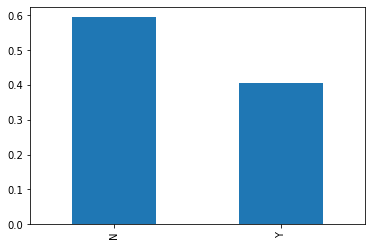

In [25]:
data["trip_same_day"].value_counts(normalize=True).plot(kind="bar")
plt.show()

<font color ="green">As in the above graph , the No response is higher than the Yes reponse from the trip_same_day</font>

In [26]:
#Check the uniqueness of the Request ID
data["Request id"].unique().size

6745

In [27]:
data.tail(20)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,RYear,RMonth,DYear,DMonth,time_duration,trip_same_day
6725,6713,City,<NA>,No Cars Available,2016-07-15 23:08:14,NaT,2016,7,<NA>,<NA>,<NA>,N
6726,6715,City,<NA>,No Cars Available,2016-07-15 23:11:41,NaT,2016,7,<NA>,<NA>,<NA>,N
6727,6716,City,<NA>,No Cars Available,2016-07-15 23:14:36,NaT,2016,7,<NA>,<NA>,<NA>,N
6728,6718,Airport,<NA>,No Cars Available,2016-07-15 23:14:39,NaT,2016,7,<NA>,<NA>,<NA>,N
6729,6720,City,<NA>,No Cars Available,2016-07-15 23:16:48,NaT,2016,7,<NA>,<NA>,<NA>,N
6730,6722,Airport,<NA>,No Cars Available,2016-07-15 23:18:21,NaT,2016,7,<NA>,<NA>,<NA>,N
6731,6725,Airport,<NA>,No Cars Available,2016-07-15 23:21:53,NaT,2016,7,<NA>,<NA>,<NA>,N
6732,6728,City,<NA>,No Cars Available,2016-07-15 23:26:50,NaT,2016,7,<NA>,<NA>,<NA>,N
6733,6730,Airport,<NA>,No Cars Available,2016-07-15 23:27:55,NaT,2016,7,<NA>,<NA>,<NA>,N
6734,6732,Airport,<NA>,No Cars Available,2016-07-15 23:35:50,NaT,2016,7,<NA>,<NA>,<NA>,N


In [28]:
data["Driver id"].unique().size

301

In [29]:
data["Driver id"].value_counts(dropna=False)

<NA>     2650
27.0       22
22.0       21
84.0       21
70.0       21
         ... 
217.0       8
42.0        7
123.0       7
265.0       6
300.0       6
Name: Driver id, Length: 301, dtype: int64

In [30]:
data["Status"].value_counts(dropna=False)

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

In [31]:
data[["Driver id","Status"]][data["Driver id"].isna()]

,Driver id,Status
4095,<NA>,No Cars Available
4096,<NA>,No Cars Available
4097,<NA>,No Cars Available
4098,<NA>,No Cars Available
4099,<NA>,No Cars Available
...,...,...
6740,<NA>,No Cars Available
6741,<NA>,No Cars Available
6742,<NA>,No Cars Available
6743,<NA>,No Cars Available


<font color="Green">Now , we have come to realize that there are Null 2650 driver id available which relates to the "No cars available" in Status column with the same value of 2650</font>

In [32]:
# We need to check the value count for Pickup Points column
data.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp', 'RYear', 'RMonth', 'DYear',
       'DMonth', 'time_duration', 'trip_same_day'],
      dtype='object')

In [33]:
data["Pickup point"].value_counts(dropna=False)

City       3507
Airport    3238
Name: Pickup point, dtype: int64

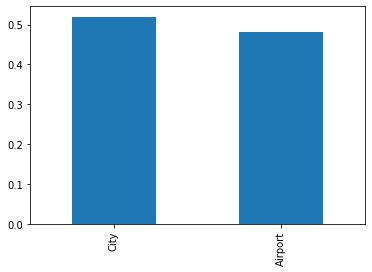

In [34]:
data["Pickup point"].value_counts(normalize=True).plot(kind="bar") #plotting the bar graph to check and compare the value counts for Airport and City
plt.show()

#### As checked in the above plot , the pickup point for City is higher than that of the Airport

In [35]:
data["Status"].value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

As checked Status column contains only 3 values - Trip Completed , No cars available and Cancelled

In [36]:
#Now we need to check the null values of the dataframe
data.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
RYear                   0
RMonth                  0
DYear                3914
DMonth               3914
time_duration        3914
trip_same_day           0
dtype: int64

As per the above code , Driver ID , drop timestamp , DYear , DMonth and time_duration are having null values.

So we need to work on the null values for these columns

Now , we need to check as for which values of Status  , Driver ID is having null values

In [37]:
data["Status"][data["Drop timestamp"].isna()].unique()

array(['Cancelled', 'No Cars Available'], dtype=object)

In [38]:
data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,RYear,RMonth,DYear,DMonth,time_duration,trip_same_day
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016,7,2016,7,69.0,Y
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016,7,2016,7,50.0,Y
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016,7,2016,7,41.0,Y
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016,7,2016,7,55.0,Y
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016,7,2016,7,52.516667,Y


In [39]:
#Requests made in 2016
print("Request Year - ",data.RYear.unique(),"\nRequest Month - ",data.DYear[~data.DYear.isna()].unique().astype(int))

Request Year -  [2016] 
Request Month -  [2016]


In [40]:
#Requests made in month of July
print("Request Month - ",data.RMonth.unique(),"\nDrop Month - ",data.DMonth[~data.DMonth.isna()].unique().astype(int))

Request Month -  [7] 
Drop Month -  [7]


#### Adding 4 columns - Rdate, Rday,Ddate,Dday

In [41]:
data["Rdate"] = pd.to_datetime(data["Request timestamp"]).dt.date
data["Rday"] = pd.to_datetime(data["Request timestamp"]).dt.day_name()
data["Ddate"] = pd.to_datetime(data["Drop timestamp"]).dt.date
data["Dday"] = pd.to_datetime(data["Drop timestamp"]).dt.day_name()
data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,RYear,RMonth,DYear,DMonth,time_duration,trip_same_day,Rdate,Rday,Ddate,Dday
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016,7,2016,7,69.0,Y,2016-07-11,Monday,2016-07-11,Monday
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016,7,2016,7,50.0,Y,2016-07-11,Monday,2016-07-11,Monday
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016,7,2016,7,41.0,Y,2016-07-12,Tuesday,2016-07-12,Tuesday
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016,7,2016,7,55.0,Y,2016-07-12,Tuesday,2016-07-12,Tuesday
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016,7,2016,7,52.516667,Y,2016-07-13,Wednesday,2016-07-13,Wednesday


#### Adding a new column as the Time which will be determining the day perioids Morning , evening , afternoon and night

In [42]:
data["Time"]=pd.to_datetime(data["Request timestamp"]).dt.time

In [43]:
data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,RYear,RMonth,DYear,DMonth,time_duration,trip_same_day,Rdate,Rday,Ddate,Dday,Time
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016,7,2016,7,69.0,Y,2016-07-11,Monday,2016-07-11,Monday,11:51:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016,7,2016,7,50.0,Y,2016-07-11,Monday,2016-07-11,Monday,17:57:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016,7,2016,7,41.0,Y,2016-07-12,Tuesday,2016-07-12,Tuesday,09:17:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016,7,2016,7,55.0,Y,2016-07-12,Tuesday,2016-07-12,Tuesday,21:08:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016,7,2016,7,52.516667,Y,2016-07-13,Wednesday,2016-07-13,Wednesday,08:33:16


In [44]:
#Adding Column "time period" which includes values like early rise ,morning , afternoon , early sunset , evening , night and late night
import datetime
data["time_period"] = pd.NA
data["time_period"][data["Time"].between(datetime.time(4,0,0), datetime.time(6,59,59), inclusive = True) == True] = "Early Rise"
data["time_period"][data["Time"].between(datetime.time(7,0,0), datetime.time(11,59,59), inclusive = True) == True] = "Morning"
data["time_period"][data["Time"].between(datetime.time(12,0,0), datetime.time(15,59,59), inclusive = True) == True] = "Afternoon"
data["time_period"][data["Time"].between(datetime.time(16,0,0), datetime.time(17,59,59), inclusive = True) == True] = "Early Sunset"
data["time_period"][data["Time"].between(datetime.time(18,0,0), datetime.time(19,59,59), inclusive = True) == True] = "Evening"
data["time_period"][data["Time"].between(datetime.time(20,0,0), datetime.time(23,59,59), inclusive = True) == True] = "Night"
data["time_period"][data["Time"].between(datetime.time(0,0,0), datetime.time(3,59,59), inclusive = True) == True] = "Late Night"
data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,RYear,RMonth,DYear,DMonth,time_duration,trip_same_day,Rdate,Rday,Ddate,Dday,Time,time_period
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016,7,2016,7,69.0,Y,2016-07-11,Monday,2016-07-11,Monday,11:51:00,Morning
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016,7,2016,7,50.0,Y,2016-07-11,Monday,2016-07-11,Monday,17:57:00,Early Sunset
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016,7,2016,7,41.0,Y,2016-07-12,Tuesday,2016-07-12,Tuesday,09:17:00,Morning
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016,7,2016,7,55.0,Y,2016-07-12,Tuesday,2016-07-12,Tuesday,21:08:00,Night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016,7,2016,7,52.516667,Y,2016-07-13,Wednesday,2016-07-13,Wednesday,08:33:16,Morning


#### Adding 2 columns Rhour and Dhour

In [45]:
data["Rhour"]=pd.to_datetime(data["Request timestamp"]).dt.hour
data["Dhour"]=pd.to_datetime(data["Drop timestamp"]).dt.hour

In [46]:
data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,RYear,RMonth,DYear,DMonth,time_duration,trip_same_day,Rdate,Rday,Ddate,Dday,Time,time_period,Rhour,Dhour
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016,7,2016,7,69.0,Y,2016-07-11,Monday,2016-07-11,Monday,11:51:00,Morning,11,13.0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016,7,2016,7,50.0,Y,2016-07-11,Monday,2016-07-11,Monday,17:57:00,Early Sunset,17,18.0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016,7,2016,7,41.0,Y,2016-07-12,Tuesday,2016-07-12,Tuesday,09:17:00,Morning,9,9.0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016,7,2016,7,55.0,Y,2016-07-12,Tuesday,2016-07-12,Tuesday,21:08:00,Night,21,22.0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016,7,2016,7,52.516667,Y,2016-07-13,Wednesday,2016-07-13,Wednesday,08:33:16,Morning,8,9.0


# With this , we have ended the Data Cleaning process. And now we will begin the Analysis Section.

# <font color='Blue'> Analysis Section </font>

In [47]:
data_pivot=pd.pivot_table(data=data,index="Pickup point",columns="Status",values="Request id",aggfunc="count")

In [48]:
data_pivot

Status,Cancelled,No Cars Available,Trip Completed
Pickup point,,,
Airport,198,1713,1327
City,1066,937,1504


In [49]:
plt.rcParams["font.family"] = "Open Sans"

findfont: Font family ['Open Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Open Sans'] not found. Falling back to DejaVu Sans.


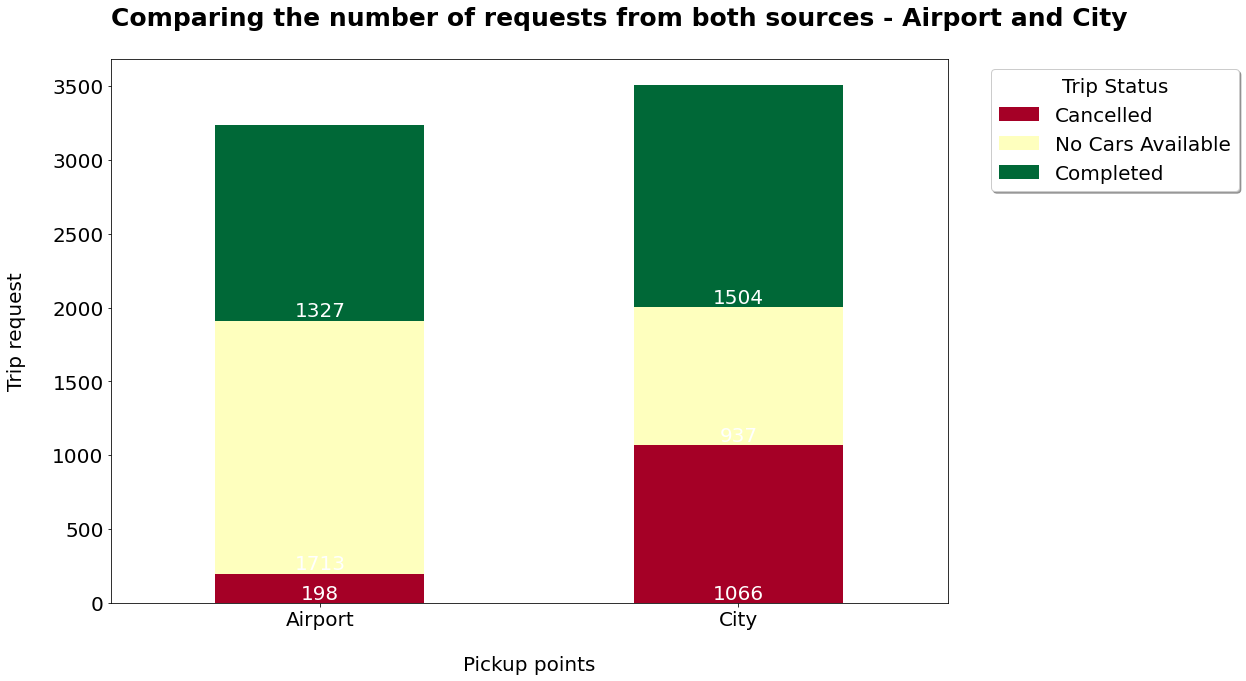

In [50]:
res = data_pivot.plot(kind='bar', stacked=True,figsize=[15,10],colormap="RdYlGn",fontsize=20)
plt.title("Comparing the number of requests from both sources - Airport and City\n",fontsize=25,loc="left",fontweight="bold")

plt.xlabel("\nPickup points",fontsize=20)
plt.setp( res.xaxis.get_majorticklabels(), rotation=0,fontsize=20)
plt.ylabel("Trip request\n",fontsize=20)
plt.setp( res.yaxis.get_majorticklabels(), rotation=0,fontsize=20)
plt.legend(title='Trip Status',title_fontsize=20,loc='upper center', bbox_to_anchor=(1.2, 1), shadow=True, ncol=1, labels=['Cancelled', 'No Cars Available', 'Completed'],fontsize=20)
for p in res.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    res.text(x+width/2,
             (y),
             '{:.0f}'.format(height),
             horizontalalignment='center',
             verticalalignment='bottom',fontsize=20,color='w')
plt.show()

#### Observations-

1. The requests from the City are showing high number of cancellations as compared to the those requests of Airport

2. No cars available from Airport is higher as compared to the City

3. Trip Requests from City has higher number of trip completed as compared to the Airport

In [51]:
request_vs_pickup=pd.pivot_table(data=data,index=["Rhour"],columns=["Pickup point"],values="Request id",aggfunc="count")

In [52]:
request_vs_pickup.head()

Pickup point,Airport,City
Rhour,,
0,53,46
1,42,43
2,41,58
3,45,47
4,72,131


findfont: Font family ['Open Sans'] not found. Falling back to DejaVu Sans.


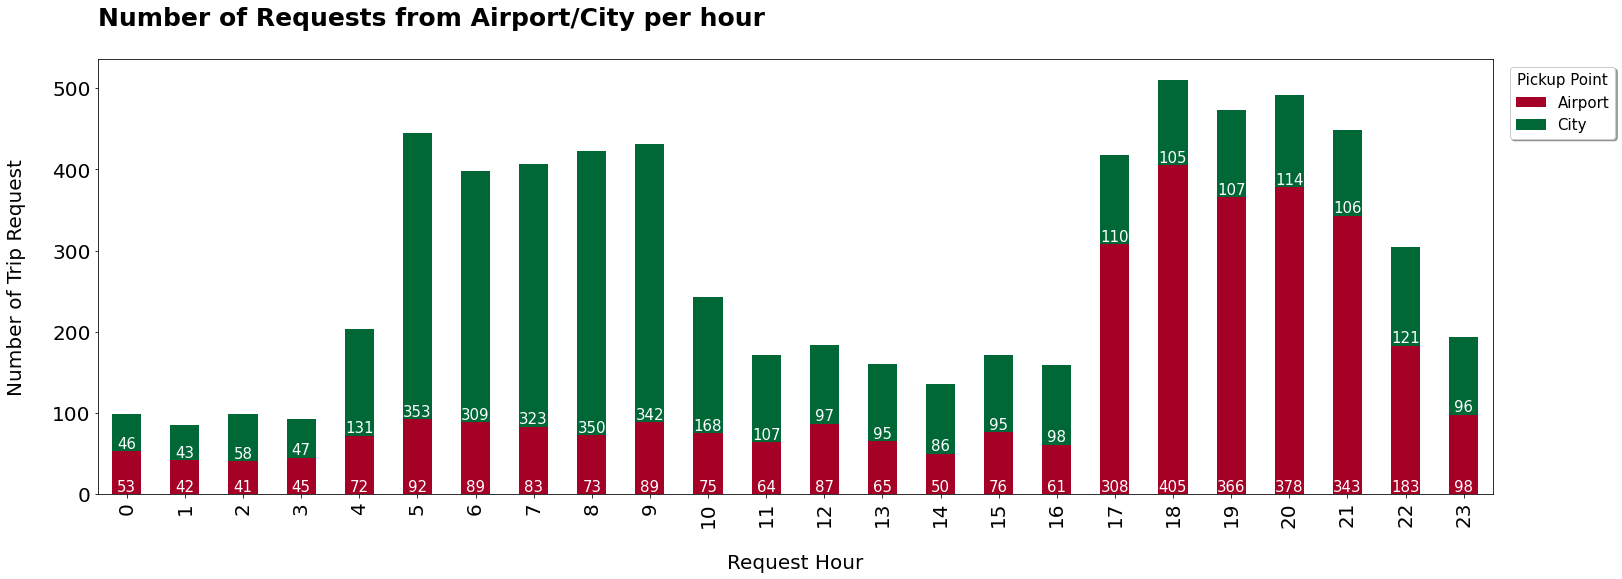

In [53]:
plt.rcParams["font.family"] = "Open Sans"
res = request_vs_pickup.plot(kind='bar', stacked=True,figsize=[25,8],colormap="RdYlGn",fontsize=20)
plt.title("Number of Requests from Airport/City per hour\n",fontsize=25,loc="left",fontweight="bold")
plt.xlabel("\nRequest Hour",fontsize=20)
plt.setp( res.xaxis.get_majorticklabels(),fontsize=20)
plt.ylabel("Number of Trip Request\n",fontsize=20)
plt.setp( res.yaxis.get_majorticklabels(),fontsize=20)
plt.legend(title='Pickup Point',title_fontsize=15,loc='upper center', bbox_to_anchor=(1.05, 1), shadow=True, ncol=1, labels=['Airport','City'],fontsize=15)
for p in res.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    res.text(x+width/2,
             (y),
             '{:.0f}'.format(height),
             horizontalalignment='center',
             verticalalignment='bottom',fontsize=15,color='w')
plt.show()

#### Observations:

1. As checked , in the early rise timings 4am to 7am , the trip requests are higher for City and same during the mornings(7am to 11am)

2. Also , during early sunset(5pm-6pm) the trip requests from Airport is higher and same in the Night(7pm-midnight)

In [54]:
trip_completions = pd.pivot_table(data=data[data.Status=="Trip Completed"],index=["Rhour"],columns=["Status","Pickup point"],values="Request id",aggfunc="count")

findfont: Font family ['Open Sans'] not found. Falling back to DejaVu Sans.


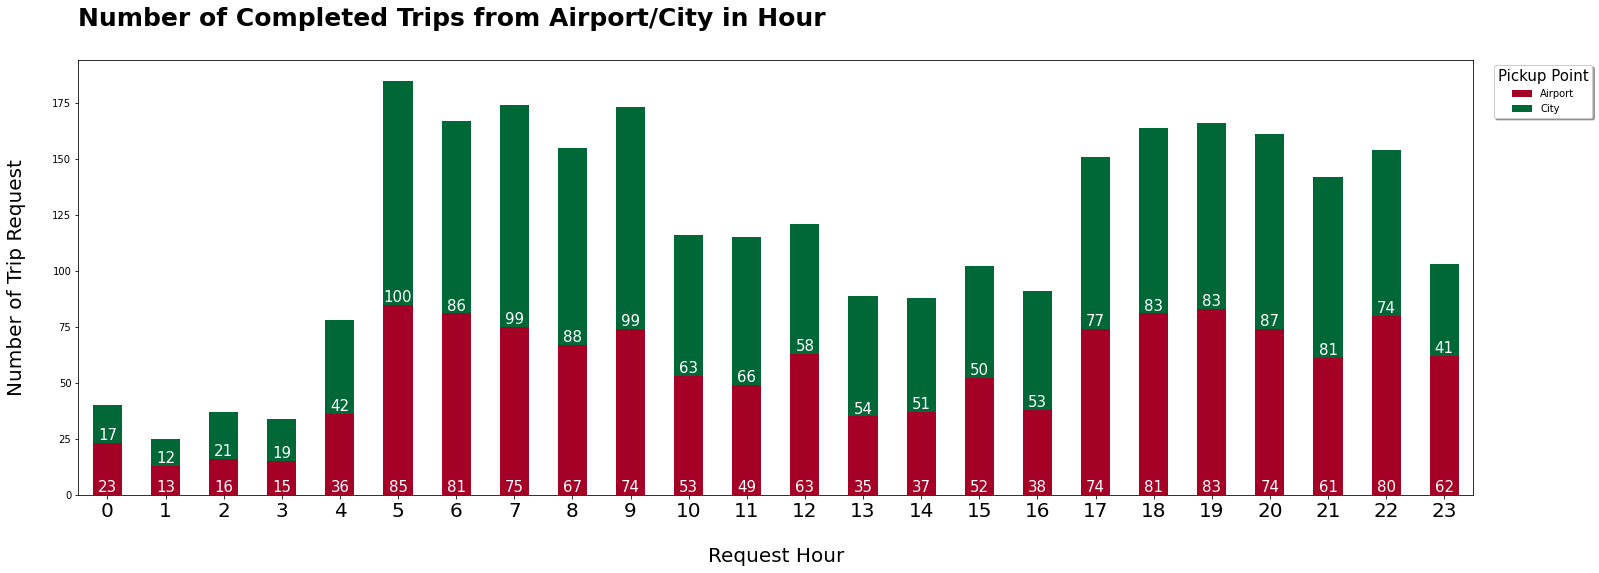

In [55]:
res = trip_completions.plot(kind='bar', stacked=True, figsize=[25,8],colormap="RdYlGn",fontsize=10)
plt.title("Number of Completed Trips from Airport/City in Hour\n",fontsize=25,fontweight="bold",loc="left")
plt.xlabel("\nRequest Hour",fontsize=20)
plt.setp(res.xaxis.get_majorticklabels(),fontsize=20,rotation=0)
plt.ylabel("Number of Trip Request\n",fontsize=20)
plt.setp(res.xaxis.get_majorticklabels(),fontsize=20)
plt.legend(title='Pickup Point',title_fontsize=15,loc='upper center', bbox_to_anchor=(1.05, 1), shadow=True, ncol=1, labels=["Airport","City"],fontsize=10)
for p in res.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    res.text(x+width/2,
             (y),
             '{:.0f}'.format(height),
             horizontalalignment='center',
             verticalalignment='bottom',fontsize=15,color="w")
plt.show()

<font color='green'>As checked , from the above code , we have observed that the busiest load comes around 5am in the Early rise mornings which is around 185 which is count of the drivers but the count of drivers are 300. </font>

<font color='red'>This means that the drivers are not taking requests at this hour , they are either cancelling them or not taking due to some other reasons</font>

findfont: Font family ['Open Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Open Sans'] not found. Falling back to DejaVu Sans.


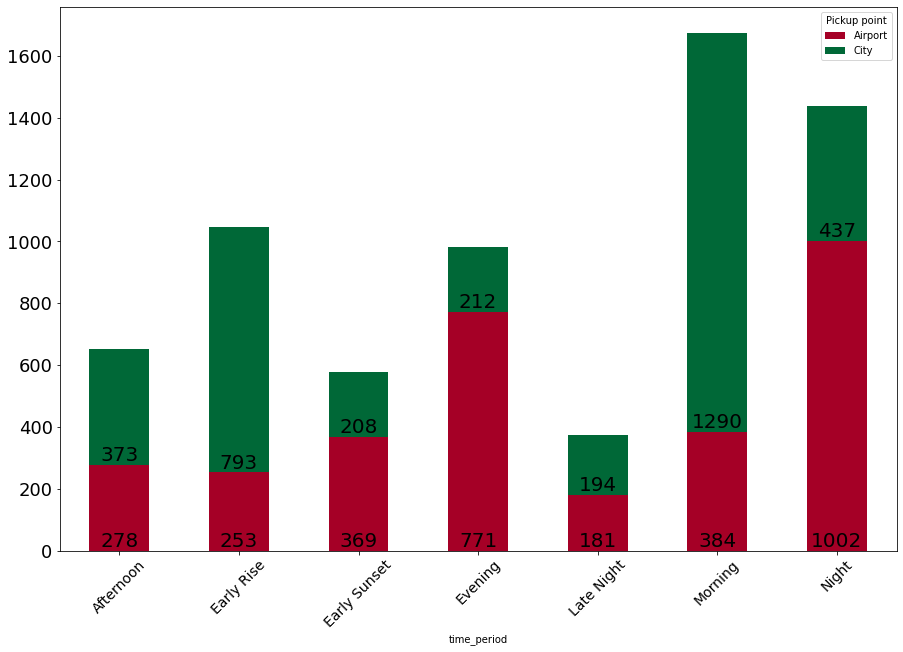

In [56]:
res=pd.pivot_table(data=data,index=["time_period"],columns="Pickup point",values="Request id",aggfunc="count").plot(kind="bar",stacked=True,figsize=[15,10],colormap="RdYlGn",fontsize=18)
plt.setp(res.xaxis.get_majorticklabels(), rotation=45,fontsize=14)
for p in res.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    res.text(x+width/2,
             (y),
             '{:.0f}'.format(height),
             horizontalalignment='center',
             verticalalignment='bottom',fontsize=20)
plt.show()

findfont: Font family ['Open Sans'] not found. Falling back to DejaVu Sans.


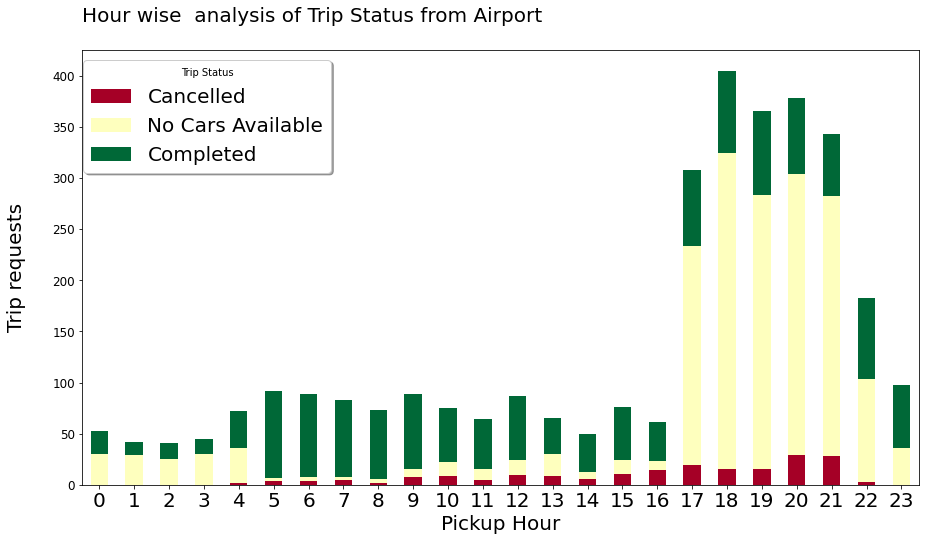

In [57]:
res = pd.pivot_table(data=data[data["Pickup point"]=="Airport"],index=["Rhour"],columns="Status",values="Request id",aggfunc="count").plot(kind='bar', stacked=True, figsize=[15,8],colormap="RdYlGn",fontsize=12,sharey=True)
plt.setp(res.xaxis.get_majorticklabels(), rotation=90 )
res.set_facecolor('white')
plt.xlabel("Pickup Hour",fontsize=20)
plt.setp( res.xaxis.get_majorticklabels(), rotation=0, fontsize=20)
plt.ylabel("Trip requests\n",fontsize=20)
plt.title("Hour wise  analysis of Trip Status from Airport\n",fontsize=20,loc="left")
plt.legend(title='Trip Status',loc='upper center', bbox_to_anchor=(0.15, 1),shadow=True, ncol=1, labels=['Cancelled', 'No Cars Available', 'Completed'],fontsize=20)
plt.show()

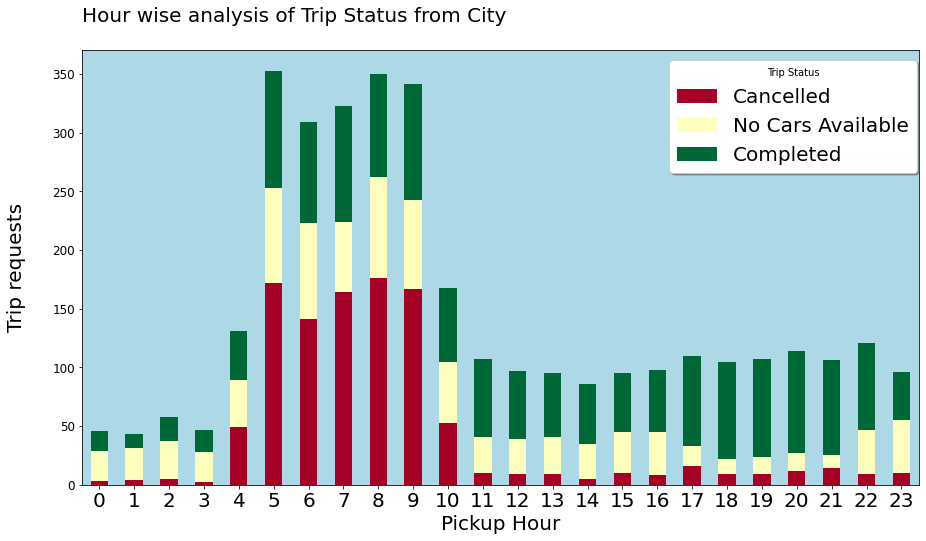

In [58]:
res = pd.pivot_table(data=data[data["Pickup point"]=="City"],index=["Rhour"],columns="Status",values="Request id",aggfunc="count").plot(kind='bar', stacked=True, figsize=[15,8],colormap="RdYlGn",fontsize=12,sharey=True)
plt.setp(res.xaxis.get_majorticklabels(), rotation=90 )
res.set_facecolor('lightblue')
plt.xlabel("Pickup Hour",fontsize=20)
plt.setp( res.xaxis.get_majorticklabels(), rotation=0,fontsize=20)
plt.ylabel("Trip requests\n",fontsize=20)
plt.title("Hour wise analysis of Trip Status from City\n",fontsize=20,loc="left")
plt.legend(title='Trip Status',loc='upper center', bbox_to_anchor=(0.85, 1),shadow=True, ncol=1, labels=['Cancelled', 'No Cars Available', 'Completed'],fontsize=20)
plt.show()

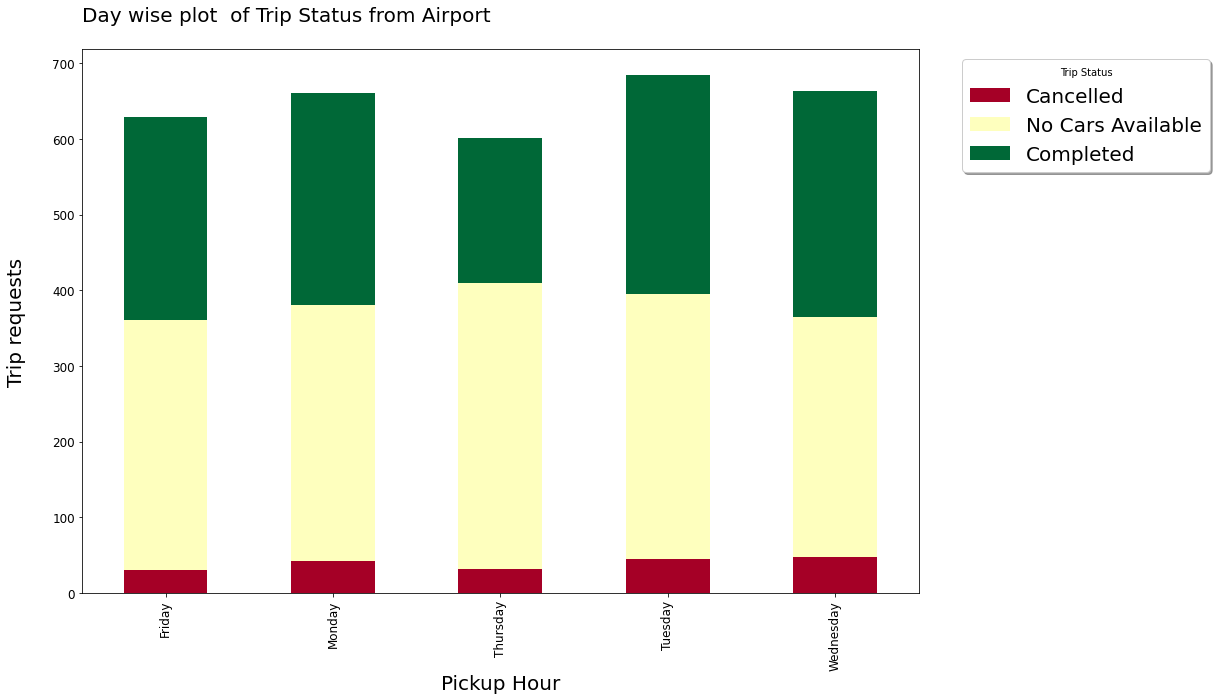

In [59]:
es = pd.pivot_table(data=data[data["Pickup point"]=="Airport"],index=["Rday"],columns="Status",values="Request id",aggfunc="count").plot(kind='bar', stacked=True, figsize=[15,10],colormap="RdYlGn",fontsize=12,sharey=True)
res.set_facecolor('lightgray')
plt.xlabel("Pickup Hour",fontsize=20)
plt.setp( res.xaxis.get_majorticklabels(), rotation=0, fontsize=20)
plt.ylabel("Trip requests\n",fontsize=20)
plt.setp( res.yaxis.get_majorticklabels(), rotation=0,fontsize=20)
plt.title("Day wise plot  of Trip Status from Airport\n",fontsize=20,loc="left")
plt.legend(title='Trip Status',loc='upper center', bbox_to_anchor=(1.2, 1),shadow=True, ncol=1, labels=['Cancelled', 'No Cars Available', 'Completed'],fontsize=20)
for p in res.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    res.text(x+width/2,
             (y+height),
             '{:.0f}'.format(height),
             horizontalalignment='center',
             verticalalignment='bottom',fontsize=20)
plt.show()

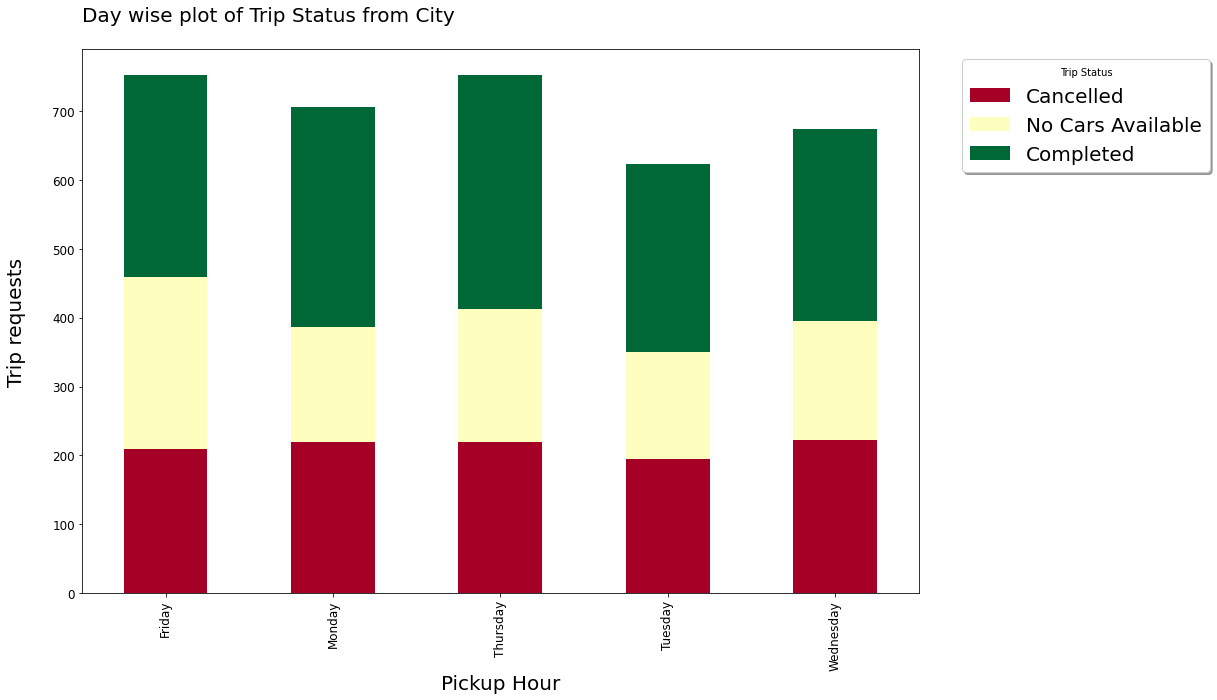

In [60]:
es = pd.pivot_table(data=data[data["Pickup point"]=="City"],index=["Rday"],columns="Status",values="Request id",aggfunc="count").plot(kind='bar', stacked=True, figsize=[15,10],colormap="RdYlGn",fontsize=12,sharey=True)
res.set_facecolor('white')
plt.xlabel("Pickup Hour",fontsize=20)
plt.setp( res.xaxis.get_majorticklabels(), rotation=0, fontsize=20)
plt.ylabel("Trip requests\n",fontsize=20)
plt.setp( res.yaxis.get_majorticklabels(), rotation=0,fontsize=20)
plt.title("Day wise plot of Trip Status from City\n",fontsize=20,loc="left")
plt.legend(title='Trip Status',loc='upper center', bbox_to_anchor=(1.2, 1),shadow=True, ncol=1, labels=['Cancelled', 'No Cars Available', 'Completed'],fontsize=20)
for p in res.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    res.text(x+width/2,
             (y+height),
             '{:.0f}'.format(height),
             horizontalalignment='center',
             verticalalignment='bottom',fontsize=20)
plt.show()

In [61]:
data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,RYear,RMonth,DYear,DMonth,time_duration,trip_same_day,Rdate,Rday,Ddate,Dday,Time,time_period,Rhour,Dhour
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016,7,2016,7,69.0,Y,2016-07-11,Monday,2016-07-11,Monday,11:51:00,Morning,11,13.0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016,7,2016,7,50.0,Y,2016-07-11,Monday,2016-07-11,Monday,17:57:00,Early Sunset,17,18.0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016,7,2016,7,41.0,Y,2016-07-12,Tuesday,2016-07-12,Tuesday,09:17:00,Morning,9,9.0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016,7,2016,7,55.0,Y,2016-07-12,Tuesday,2016-07-12,Tuesday,21:08:00,Night,21,22.0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016,7,2016,7,52.516667,Y,2016-07-13,Wednesday,2016-07-13,Wednesday,08:33:16,Morning,8,9.0


In [62]:
new_pivot=pd.pivot_table(data=data,index=["Rhour","Pickup point"],columns="Status",values="Request id",aggfunc="count",margins=True,margins_name="All")
new_pivot.fillna(0,inplace=True)
new_pivot["%Cancelled"]=100*new_pivot["Cancelled"]/new_pivot.All
new_pivot["%No Cars Available"]=100*new_pivot["No Cars Available"]/new_pivot.All
new_pivot["%Completed"]=100*new_pivot["Trip Completed"]/new_pivot.All
new_pivot.drop(columns=["All"],inplace=True)
new_pivot

Status              Cancelled  No Cars Available  Trip Completed  %Cancelled  \
Rhour Pickup point                                                             
0     Airport             0.0               30.0            23.0    0.000000   
      City                3.0               26.0            17.0    6.521739   
1     Airport             0.0               29.0            13.0    0.000000   
      City                4.0               27.0            12.0    9.302326   
2     Airport             0.0               25.0            16.0    0.000000   
      City                5.0               32.0            21.0    8.620690   
3     Airport             0.0               30.0            15.0    0.000000   
      City                2.0               26.0            19.0    4.255319   
4     Airport             2.0               34.0            36.0    2.777778   
      City               49.0               40.0            42.0   37.404580   
5     Airport             4.0                3.0            85.0    4.347826   
      City              172.0               81.0           100.0   48.725212   
6     Airport             4.0                4.0            81.0    4.494382   
      City              141.0               82.0            86.0   45.631068   
7     Airport             5.0                3.0            75.0    6.024096   
      City              164.0               60.0            99.0   50.773994   
8     Airport             2.0                4.0            67.0    2.739726   
      City              176.0               86.0            88.0   50.285714   
9     Airport             8.0                7.0            74.0    8.988764   
      City              167.0               76.0            99.0   48.830409   
10    Airport             9.0               13.0            53.0   12.000000   
      City               53.0               52.0            63.0   31.547619   
11    Airport             5.0               10.0            49.0    7.812500   
      City               10.0               31.0            66.0    9.345794   
12    Airport            10.0               14.0            63.0   11.494253   
      City                9.0               30.0            58.0    9.278351   
13    Airport             9.0               21.0            35.0   13.846154   
      City                9.0               32.0            54.0    9.473684   
14    Airport             6.0                7.0            37.0   12.000000   
      City                5.0               30.0            51.0    5.813953   
15    Airport            11.0               13.0            52.0   14.473684   
      City               10.0               35.0            50.0   10.526316   
16    Airport            14.0                9.0            38.0   22.950820   
      City                8.0               37.0            53.0    8.163265   
17    Airport            19.0              215.0            74.0    6.168831   
      City               16.0               17.0            77.0   14.545455   
18    Airport            15.0              309.0            81.0    3.703704   
      City                9.0               13.0            83.0    8.571429   
19    Airport            15.0              268.0            83.0    4.098361   
      City                9.0               15.0            83.0    8.411215   
20    Airport            29.0              275.0            74.0    7.671958   
      City               12.0               15.0            87.0   10.526316   
21    Airport            28.0              254.0            61.0    8.163265   
      City               14.0               11.0            81.0   13.207547   
22    Airport             3.0              100.0            80.0    1.639344   
      City                9.0               38.0            74.0    7.438017   
23    Airport             0.0               36.0            62.0    0.000000   
      City               10.0               45.0            41.0   10.416667   


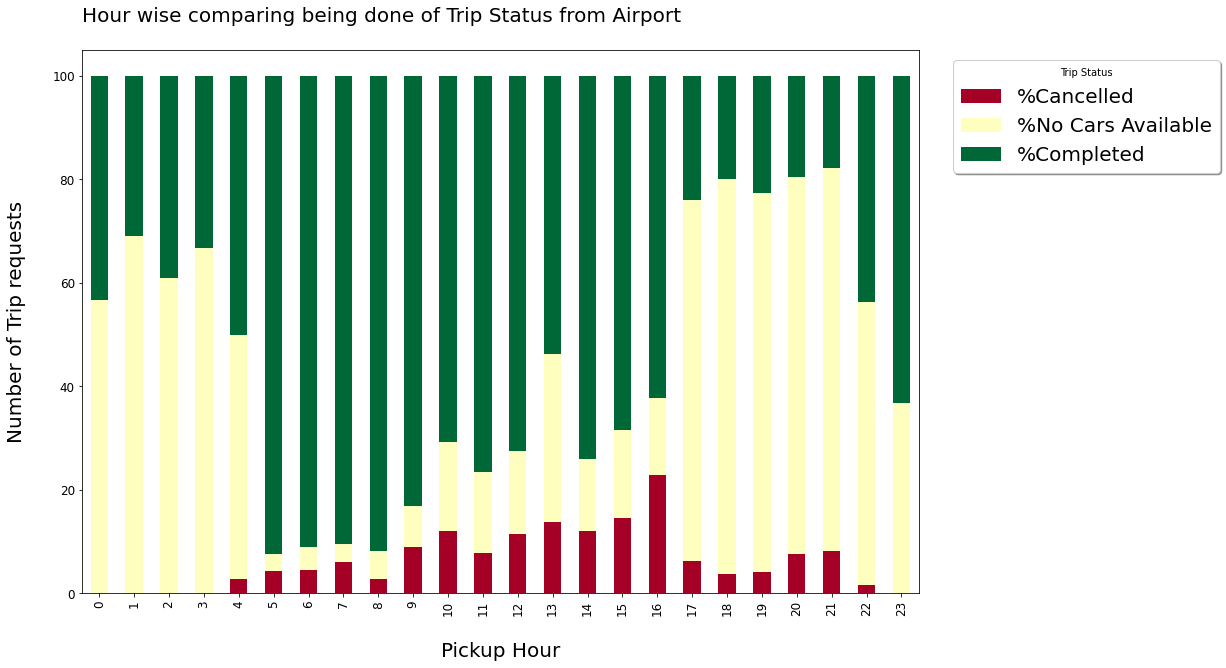

In [63]:
ans = new_pivot.xs("Airport",level=1).iloc[0:,3:].plot(kind='bar', stacked=True, figsize=[15,10],colormap="RdYlGn",fontsize=12,sharey=True)
plt.setp(res.xaxis.get_majorticklabels(), rotation=90 )
res.set_facecolor('lightblue')
plt.xlabel("\nPickup Hour",fontsize=20)
plt.setp( res.xaxis.get_majorticklabels(), rotation=0,fontsize=20)
plt.ylabel("Number of Trip requests\n",fontsize=20)
plt.setp( res.yaxis.get_majorticklabels(), rotation=0,fontsize=20)
plt.title("Hour wise comparing being done of Trip Status from Airport\n",fontsize=20,loc="left")
plt.legend(title='Trip Status',loc='upper center', bbox_to_anchor=(1.2, 1),shadow=True, ncol=1, labels=['%Cancelled', '%No Cars Available', '%Completed'],fontsize=20)
plt.show()

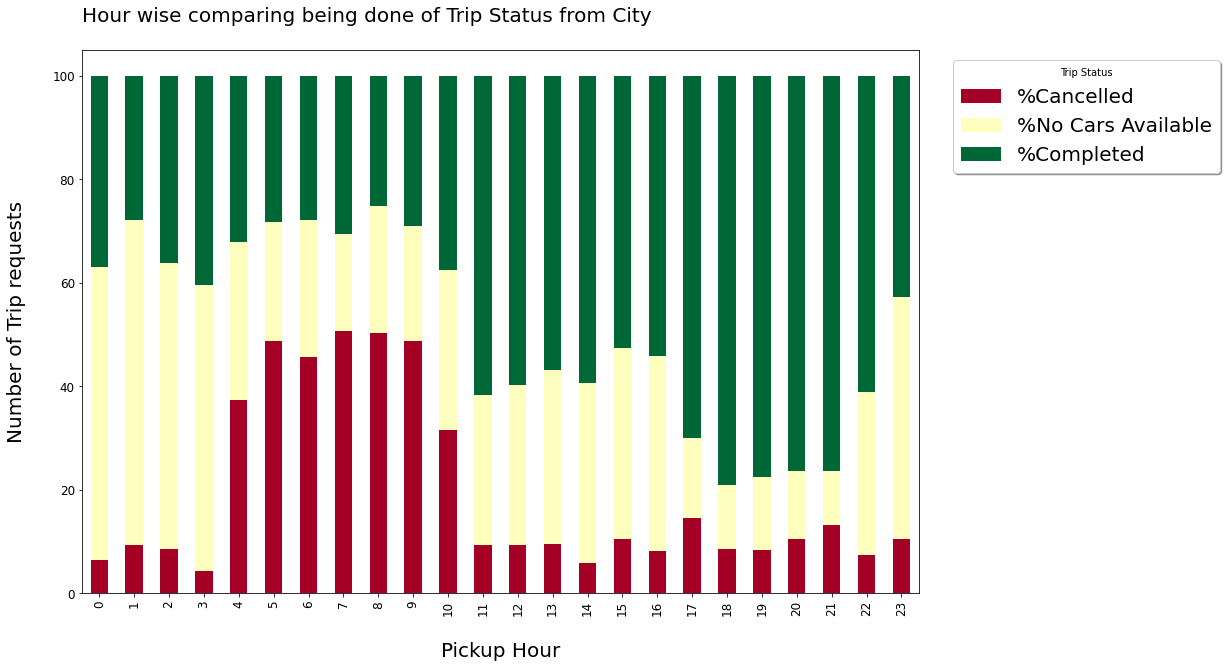

In [64]:
ans= new_pivot.xs("City",level=1).iloc[0:,3:].plot(kind='bar', stacked=True, figsize=[15,10],colormap="RdYlGn",fontsize=12,sharey=True)
plt.setp(res.xaxis.get_majorticklabels(), rotation=90 )
res.set_facecolor('lightblue')
plt.xlabel("\nPickup Hour",fontsize=20)
plt.setp( res.xaxis.get_majorticklabels(), rotation=0,fontsize=20)
plt.ylabel("Number of Trip requests\n",fontsize=20)
plt.setp( res.yaxis.get_majorticklabels(), rotation=0,fontsize=20)
plt.title("Hour wise comparing being done of Trip Status from City\n",fontsize=20,loc="left")
plt.legend(title='Trip Status',loc='upper center', bbox_to_anchor=(1.2, 1),shadow=True, ncol=1, labels=['%Cancelled', '%No Cars Available', '%Completed'],fontsize=20)
plt.show()

In [65]:
data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,RYear,RMonth,DYear,DMonth,time_duration,trip_same_day,Rdate,Rday,Ddate,Dday,Time,time_period,Rhour,Dhour
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016,7,2016,7,69.0,Y,2016-07-11,Monday,2016-07-11,Monday,11:51:00,Morning,11,13.0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016,7,2016,7,50.0,Y,2016-07-11,Monday,2016-07-11,Monday,17:57:00,Early Sunset,17,18.0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016,7,2016,7,41.0,Y,2016-07-12,Tuesday,2016-07-12,Tuesday,09:17:00,Morning,9,9.0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016,7,2016,7,55.0,Y,2016-07-12,Tuesday,2016-07-12,Tuesday,21:08:00,Night,21,22.0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016,7,2016,7,52.516667,Y,2016-07-13,Wednesday,2016-07-13,Wednesday,08:33:16,Morning,8,9.0


In [66]:
data.time_duration[(~data.time_duration.isna()) & (data["Pickup point"]=="Airport")].describe()

count    1327.000000
mean       52.238495
std        13.848307
min        21.183333
25%        41.000000
50%        51.600000
75%        64.000000
max        82.066667
Name: time_duration, dtype: float64

In [67]:
trip_dur=data[["Rhour","time_duration","Request id","Status","Pickup point"]][(~data.time_duration.isna())]

In [68]:
trip_dur

,Rhour,time_duration,Request id,Status,Pickup point
0,11,69.0,619,Trip Completed,Airport
1,17,50.0,867,Trip Completed,Airport
2,9,41.0,1807,Trip Completed,City
3,21,55.0,2532,Trip Completed,Airport
4,8,52.516667,3112,Trip Completed,City
...,...,...,...,...,...
2826,22,41.0,1315,Trip Completed,Airport
2827,6,49.5,2924,Trip Completed,City
2828,12,42.7,3324,Trip Completed,Airport
2829,22,77.083333,3935,Trip Completed,Airport


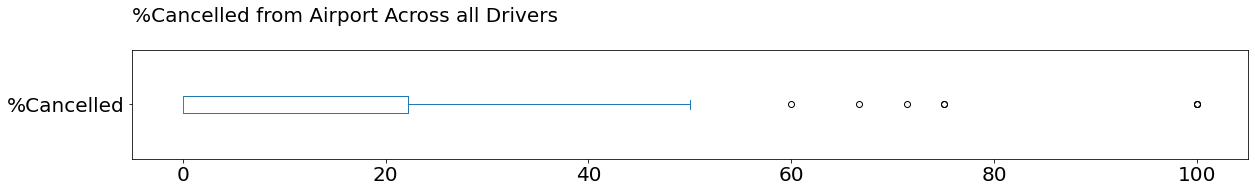

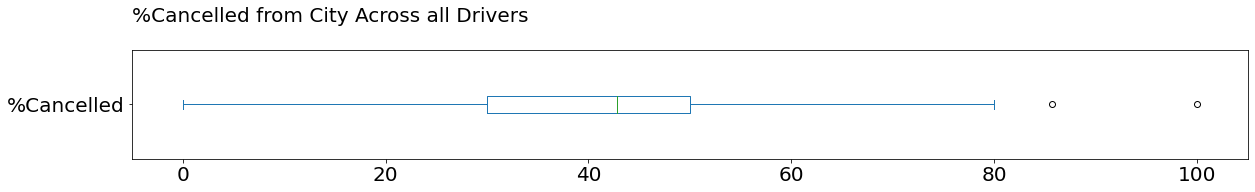

In [69]:
driver_perf_Airport = pd.pivot_table(data=data[data["Pickup point"] == "Airport"],index=["Driver id"],columns="Status",values="Request id",aggfunc="count",margins=True,margins_name="All").reset_index()
driver_perf_Airport.fillna(0,inplace=True)
driver_perf_Airport["%Cancelled"] = 100*driver_perf_Airport.Cancelled/driver_perf_Airport.All
driver_perf_Airport[["Driver id","%Cancelled"]].sort_values(by="%Cancelled",ascending=False).plot(kind="box",vert=False,figsize=[20,2],fontsize=20)
plt.title("%Cancelled from Airport Across all Drivers\n",fontsize=20,loc="left")
plt.show()
driver_perf_City = pd.pivot_table(data=data[data["Pickup point"] == "City"],index=["Driver id"],columns="Status",values="Request id",aggfunc="count",margins=True,margins_name="All").reset_index()
driver_perf_City.fillna(0,inplace=True)
driver_perf_City["%Cancelled"] = 100*driver_perf_City.Cancelled/driver_perf_City.All
driver_perf_City[["Driver id","%Cancelled"]].sort_values(by="%Cancelled",ascending=False).plot(kind="box",vert=False,figsize=[20,2],fontsize=20)
plt.title("%Cancelled from City Across all Drivers\n",fontsize=20,loc="left")
plt.show()

In [70]:
100*driver_perf_Airport[["Driver id"]][driver_perf_Airport["%Cancelled"]<22].unstack().unique().size/data["Driver id"].unique().size,100*driver_perf_City[["Driver id"]][driver_perf_City["%Cancelled"]<50].unstack().unique().size/data["Driver id"].unique().size

(74.75083056478405, 64.78405315614619)

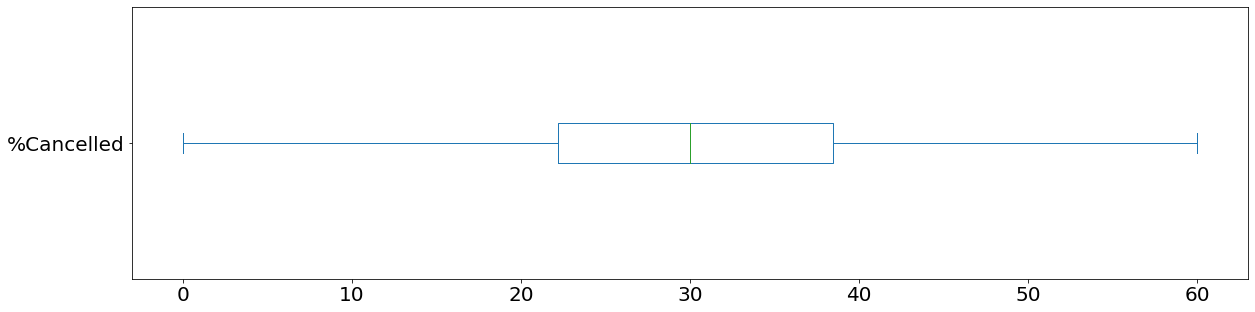

In [71]:
driver_All = pd.pivot_table(data=data,index=["Driver id"],columns="Status",values="Request id",aggfunc="count",margins=True,margins_name="All").reset_index()
driver_All.fillna(0,inplace=True)
driver_All["%Cancelled"] = 100*driver_All.Cancelled/driver_All.All
driver_All[["Driver id","%Cancelled"]].sort_values(by="%Cancelled",ascending=False).plot(kind="box",vert=False,figsize=[20,5],fontsize=20)
plt.show()

In [72]:
100*driver_All[["Driver id"]][driver_All["%Cancelled"]<40].unstack().unique().size/data["Driver id"].unique().size

75.74750830564784

In [73]:
data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,RYear,RMonth,DYear,DMonth,time_duration,trip_same_day,Rdate,Rday,Ddate,Dday,Time,time_period,Rhour,Dhour
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016,7,2016,7,69.0,Y,2016-07-11,Monday,2016-07-11,Monday,11:51:00,Morning,11,13.0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016,7,2016,7,50.0,Y,2016-07-11,Monday,2016-07-11,Monday,17:57:00,Early Sunset,17,18.0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016,7,2016,7,41.0,Y,2016-07-12,Tuesday,2016-07-12,Tuesday,09:17:00,Morning,9,9.0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016,7,2016,7,55.0,Y,2016-07-12,Tuesday,2016-07-12,Tuesday,21:08:00,Night,21,22.0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016,7,2016,7,52.516667,Y,2016-07-13,Wednesday,2016-07-13,Wednesday,08:33:16,Morning,8,9.0


In [74]:
sorted_data=data[~data.time_duration.isna()].sort_values(by=["Driver id","Request timestamp"])
sorted_data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,RYear,RMonth,DYear,DMonth,time_duration,trip_same_day,Rdate,Rday,Ddate,Dday,Time,time_period,Rhour,Dhour
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016,7,2016,7,69.0,Y,2016-07-11,Monday,2016-07-11,Monday,11:51:00,Morning,11,13.0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016,7,2016,7,50.0,Y,2016-07-11,Monday,2016-07-11,Monday,17:57:00,Early Sunset,17,18.0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016,7,2016,7,41.0,Y,2016-07-12,Tuesday,2016-07-12,Tuesday,09:17:00,Morning,9,9.0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016,7,2016,7,55.0,Y,2016-07-12,Tuesday,2016-07-12,Tuesday,21:08:00,Night,21,22.0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016,7,2016,7,52.516667,Y,2016-07-13,Wednesday,2016-07-13,Wednesday,08:33:16,Morning,8,9.0


In [75]:
sorted_data["Driver_id_next"] = sorted_data["Driver id"].shift(-1)
sorted_data["Pickup_point_next"] = sorted_data["Pickup point"].shift(-1)
sorted_data["Request_timestamp_next"] = sorted_data["Request timestamp"].shift(-1)
sorted_data["time_next"] = sorted_data["time_duration"].shift(-1)
sorted_data["time_period_next"] = sorted_data["time_period"].shift(-1)
sorted_data["Rhour_next"] = sorted_data["Rhour"].shift(-1)
sorted_data["Rday_next"] = sorted_data["Rday"].shift(-1)
sorted_data["Rhour_next"] = sorted_data["Rhour_next"].astype("Int64")
sorted_data["Rdate_next"] = sorted_data["Rdate"].shift(-1)

In [76]:
sorted_data = sorted_data[["Request id","Driver id","Driver_id_next","Pickup point","Pickup_point_next","Request timestamp","Request_timestamp_next","time_duration","time_next","time_period","time_period_next","Rhour","Rhour_next","Rday","Rday_next","Rdate","Rdate_next"]]
sorted_data

,Request id,Driver id,Driver_id_next,Pickup point,Pickup_point_next,Request timestamp,Request_timestamp_next,time_duration,time_next,time_period,time_period_next,Rhour,Rhour_next,Rday,Rday_next,Rdate,Rdate_next
0,619,1.0,1.0,Airport,Airport,2016-07-11 11:51:00,2016-07-11 17:57:00,69.0,50.0,Morning,Early Sunset,11,17,Monday,Monday,2016-07-11,2016-07-11
1,867,1.0,1.0,Airport,City,2016-07-11 17:57:00,2016-07-12 09:17:00,50.0,41.0,Early Sunset,Morning,17,9,Monday,Tuesday,2016-07-11,2016-07-12
2,1807,1.0,1.0,City,Airport,2016-07-12 09:17:00,2016-07-12 21:08:00,41.0,55.0,Morning,Night,9,21,Tuesday,Tuesday,2016-07-12,2016-07-12
3,2532,1.0,1.0,Airport,City,2016-07-12 21:08:00,2016-07-13 08:33:16,55.0,52.516667,Night,Morning,21,8,Tuesday,Wednesday,2016-07-12,2016-07-13
4,3112,1.0,1.0,City,Airport,2016-07-13 08:33:16,2016-07-13 21:57:28,52.516667,31.516667,Morning,Night,8,21,Wednesday,Wednesday,2016-07-13,2016-07-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,1330,99.0,99.0,Airport,Airport,2016-07-11 23:11:00,2016-07-13 09:52:49,63.0,40.816667,Night,Morning,23,9,Monday,Wednesday,2016-07-11,2016-07-13
961,3227,99.0,99.0,Airport,City,2016-07-13 09:52:49,2016-07-14 18:14:26,40.816667,65.866667,Morning,Evening,9,18,Wednesday,Thursday,2016-07-13,2016-07-14
962,4921,99.0,99.0,City,City,2016-07-14 18:14:26,2016-07-14 23:42:23,65.866667,35.016667,Evening,Night,18,23,Thursday,Thursday,2016-07-14,2016-07-14
963,5373,99.0,99.0,City,Airport,2016-07-14 23:42:23,2016-07-15 21:49:41,35.016667,38.95,Night,Night,23,21,Thursday,Friday,2016-07-14,2016-07-15


In [77]:
sorted_data[sorted_data["Driver id"]!=sorted_data["Driver_id_next"]]

,Request id,Driver id,Driver_id_next,Pickup point,Pickup_point_next,Request timestamp,Request_timestamp_next,time_duration,time_next,time_period,time_period_next,Rhour,Rhour_next,Rday,Rday_next,Rdate,Rdate_next
8,6248,1.0,10.0,City,Airport,2016-07-15 17:57:27,2016-07-12 09:13:00,53.4,48.0,Early Sunset,Morning,17,9,Friday,Tuesday,2016-07-15,2016-07-12
92,6157,10.0,100.0,Airport,City,2016-07-15 16:32:51,2016-07-11 03:22:00,71.883333,35.0,Early Sunset,Late Night,16,3,Friday,Monday,2016-07-15,2016-07-11
973,5834,100.0,101.0,Airport,City,2016-07-15 08:54:03,2016-07-11 12:28:00,71.833333,28.0,Morning,Afternoon,8,12,Friday,Monday,2016-07-15,2016-07-11
981,6604,101.0,102.0,City,Airport,2016-07-15 21:42:04,2016-07-11 08:09:00,37.233333,67.0,Night,Morning,21,8,Friday,Monday,2016-07-15,2016-07-11
991,6704,102.0,103.0,Airport,Airport,2016-07-15 22:58:01,2016-07-12 15:02:00,61.566667,34.0,Night,Afternoon,22,15,Friday,Tuesday,2016-07-15,2016-07-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923,6645,95.0,96.0,City,Airport,2016-07-15 22:10:21,2016-07-11 05:35:00,50.4,65.0,Night,Early Rise,22,5,Friday,Monday,2016-07-15,2016-07-11
935,6198,96.0,97.0,Airport,Airport,2016-07-15 17:23:01,2016-07-11 10:37:00,48.733333,67.0,Early Sunset,Morning,17,10,Friday,Monday,2016-07-15,2016-07-11
944,6577,97.0,98.0,City,Airport,2016-07-15 21:19:03,2016-07-12 06:21:00,29.85,71.0,Night,Early Rise,21,6,Friday,Tuesday,2016-07-15,2016-07-12
956,6252,98.0,99.0,City,Airport,2016-07-15 18:00:40,2016-07-11 05:08:00,45.383333,61.0,Evening,Early Rise,18,5,Friday,Monday,2016-07-15,2016-07-11


In [78]:
sorted_data["Waiting"]=0
sorted_data.Waiting

0      0
1      0
2      0
3      0
4      0
      ..
960    0
961    0
962    0
963    0
964    0
Name: Waiting, Length: 2831, dtype: int64

In [79]:
arr = np.empty(0)
for x in range(0,100):
    arr = np.append(arr,np.NAN)
arr
empty_df = pd.DataFrame(arr)
empty_df.fillna(0,inplace=True)
empty_df

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
95,0.0
96,0.0
97,0.0
98,0.0


In [80]:
for index,row in sorted_data[["Waiting"]][sorted_data["Driver id"] != sorted_data["Driver_id_next"]].iterrows():
    sorted_data.at[index,"Waiting"]="Waiting"

In [81]:
sorted_data[["Waiting"]][sorted_data["Driver id"] != sorted_data["Driver_id_next"]]

,Waiting
8,Waiting
92,Waiting
973,Waiting
981,Waiting
991,Waiting
...,...
923,Waiting
935,Waiting
944,Waiting
956,Waiting


In [82]:
sorted_data.Waiting.value_counts(dropna=False)

0          2531
Waiting     300
Name: Waiting, dtype: int64

In [83]:
sorted_data[(~(sorted_data["Rhour"] == sorted_data["Rhour_next"])) & (sorted_data["Driver id"] == sorted_data["Driver_id_next"]) & (~(sorted_data["Pickup point"] == sorted_data["Pickup_point_next"]))]

,Request id,Driver id,Driver_id_next,Pickup point,Pickup_point_next,Request timestamp,Request_timestamp_next,time_duration,time_next,time_period,time_period_next,Rhour,Rhour_next,Rday,Rday_next,Rdate,Rdate_next,Waiting
1,867,1.0,1.0,Airport,City,2016-07-11 17:57:00,2016-07-12 09:17:00,50.0,41.0,Early Sunset,Morning,17,9,Monday,Tuesday,2016-07-11,2016-07-12,0
2,1807,1.0,1.0,City,Airport,2016-07-12 09:17:00,2016-07-12 21:08:00,41.0,55.0,Morning,Night,9,21,Tuesday,Tuesday,2016-07-12,2016-07-12,0
3,2532,1.0,1.0,Airport,City,2016-07-12 21:08:00,2016-07-13 08:33:16,55.0,52.516667,Night,Morning,21,8,Tuesday,Wednesday,2016-07-12,2016-07-13,0
4,3112,1.0,1.0,City,Airport,2016-07-13 08:33:16,2016-07-13 21:57:28,52.516667,31.516667,Morning,Night,8,21,Wednesday,Wednesday,2016-07-13,2016-07-13,0
7,5510,1.0,1.0,Airport,City,2016-07-15 05:11:52,2016-07-15 17:57:27,56.0,53.4,Early Rise,Early Sunset,5,17,Friday,Friday,2016-07-15,2016-07-15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,6117,98.0,98.0,Airport,City,2016-07-15 15:17:13,2016-07-15 18:00:40,49.683333,45.383333,Afternoon,Evening,15,18,Friday,Friday,2016-07-15,2016-07-15,0
957,101,99.0,99.0,Airport,City,2016-07-11 05:08:00,2016-07-11 07:53:00,61.0,62.0,Early Rise,Morning,5,7,Monday,Monday,2016-07-11,2016-07-11,0
959,871,99.0,99.0,City,Airport,2016-07-11 17:57:00,2016-07-11 23:11:00,45.0,63.0,Early Sunset,Night,17,23,Monday,Monday,2016-07-11,2016-07-11,0
961,3227,99.0,99.0,Airport,City,2016-07-13 09:52:49,2016-07-14 18:14:26,40.816667,65.866667,Morning,Evening,9,18,Wednesday,Thursday,2016-07-13,2016-07-14,0


In [84]:
for index,row in sorted_data[["Waiting"]][(~(sorted_data["Rhour"] == sorted_data["Rhour_next"])) & (sorted_data["Driver id"] == sorted_data["Driver_id_next"]) & (~(sorted_data["Pickup point"] == sorted_data["Pickup_point_next"]))].iterrows():
    sorted_data.at[index,"Waiting"]="Waiting"

In [85]:
sorted_data["Waiting"][(~(sorted_data["Rhour"] == sorted_data["Rhour_next"])) & (sorted_data["Driver id"] == sorted_data["Driver_id_next"]) & (~(sorted_data["Pickup point"] == sorted_data["Pickup_point_next"]))]

1      Waiting
2      Waiting
3      Waiting
4      Waiting
7      Waiting
        ...   
955    Waiting
957    Waiting
959    Waiting
961    Waiting
963    Waiting
Name: Waiting, Length: 1310, dtype: object

In [86]:
sorted_data[sorted_data.Waiting=="Waiting"]

,Request id,Driver id,Driver_id_next,Pickup point,Pickup_point_next,Request timestamp,Request_timestamp_next,time_duration,time_next,time_period,time_period_next,Rhour,Rhour_next,Rday,Rday_next,Rdate,Rdate_next,Waiting
1,867,1.0,1.0,Airport,City,2016-07-11 17:57:00,2016-07-12 09:17:00,50.0,41.0,Early Sunset,Morning,17,9,Monday,Tuesday,2016-07-11,2016-07-12,Waiting
2,1807,1.0,1.0,City,Airport,2016-07-12 09:17:00,2016-07-12 21:08:00,41.0,55.0,Morning,Night,9,21,Tuesday,Tuesday,2016-07-12,2016-07-12,Waiting
3,2532,1.0,1.0,Airport,City,2016-07-12 21:08:00,2016-07-13 08:33:16,55.0,52.516667,Night,Morning,21,8,Tuesday,Wednesday,2016-07-12,2016-07-13,Waiting
4,3112,1.0,1.0,City,Airport,2016-07-13 08:33:16,2016-07-13 21:57:28,52.516667,31.516667,Morning,Night,8,21,Wednesday,Wednesday,2016-07-13,2016-07-13,Waiting
7,5510,1.0,1.0,Airport,City,2016-07-15 05:11:52,2016-07-15 17:57:27,56.0,53.4,Early Rise,Early Sunset,5,17,Friday,Friday,2016-07-15,2016-07-15,Waiting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,101,99.0,99.0,Airport,City,2016-07-11 05:08:00,2016-07-11 07:53:00,61.0,62.0,Early Rise,Morning,5,7,Monday,Monday,2016-07-11,2016-07-11,Waiting
959,871,99.0,99.0,City,Airport,2016-07-11 17:57:00,2016-07-11 23:11:00,45.0,63.0,Early Sunset,Night,17,23,Monday,Monday,2016-07-11,2016-07-11,Waiting
961,3227,99.0,99.0,Airport,City,2016-07-13 09:52:49,2016-07-14 18:14:26,40.816667,65.866667,Morning,Evening,9,18,Wednesday,Thursday,2016-07-13,2016-07-14,Waiting
963,5373,99.0,99.0,City,Airport,2016-07-14 23:42:23,2016-07-15 21:49:41,35.016667,38.95,Night,Night,23,21,Thursday,Friday,2016-07-14,2016-07-15,Waiting


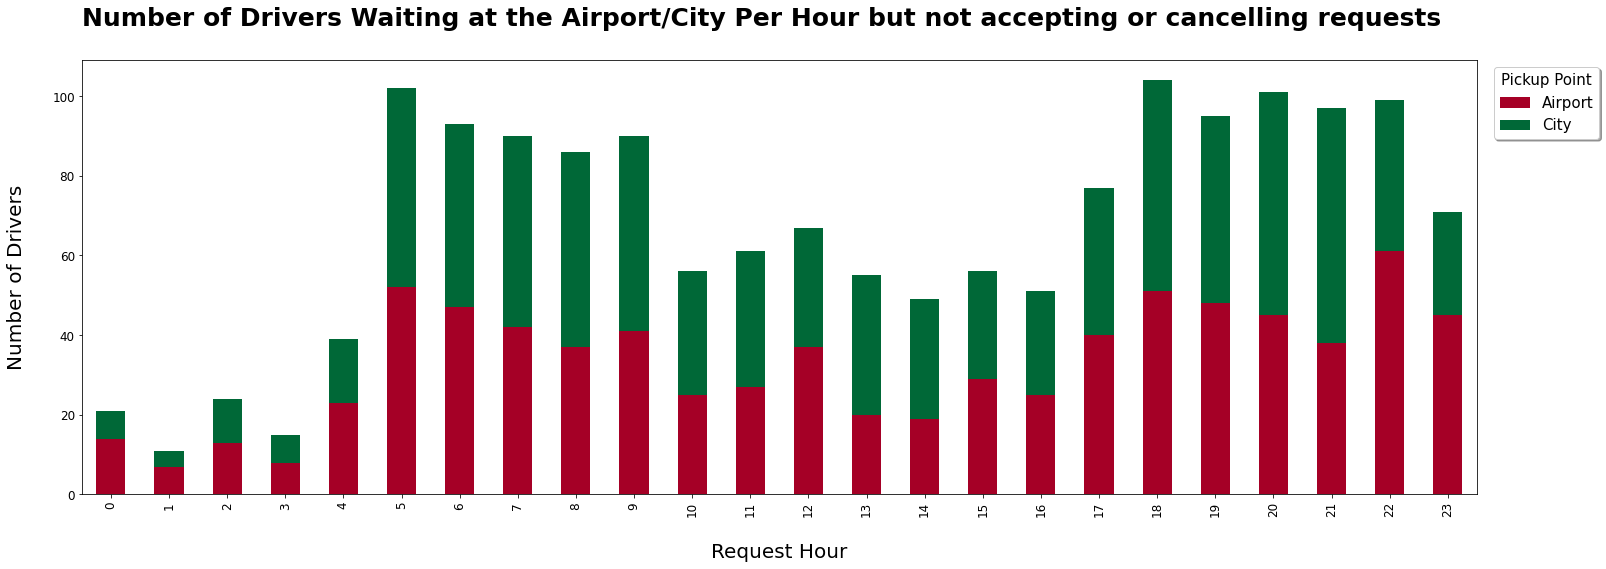

In [87]:
ans = pd.pivot_table(data=sorted_data[sorted_data.Waiting=="Waiting"],index="Rhour",columns="Pickup point",values="Waiting",aggfunc="count").plot(kind="bar",stacked=True,figsize=[25,8],colormap="RdYlGn",fontsize=12)
plt.title("Number of Drivers Waiting at the Airport/City Per Hour but not accepting or cancelling requests\n",fontsize=25,fontweight="bold",loc="left")
plt.xlabel("\nRequest Hour",fontsize=20)
plt.setp(res.xaxis.get_majorticklabels(),fontsize=20,rotation=0)
plt.ylabel("Number of Drivers\n",fontsize=20)
plt.setp(res.xaxis.get_majorticklabels(),fontsize=20)
plt.legend(title='Pickup Point',title_fontsize=15,loc='upper center', bbox_to_anchor=(1.05, 1), shadow=True, ncol=1, labels=["Airport","City"],fontsize=15)
for p in res.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    res.text(x+width/2,
             (y),
             '{:.0f}'.format(height),
             horizontalalignment='center',
             verticalalignment='bottom',fontsize=15,color="w")
plt.show()

In [88]:
hour_requests_vs_status = pd.pivot_table(data=data,index=["Rhour"],columns=["Status"],values="Request id",aggfunc="count")
hour_requests_vs_status.head()

Status,Cancelled,No Cars Available,Trip Completed
Rhour,,,
0,3,56,40
1,4,56,25
2,5,57,37
3,2,56,34
4,51,74,78


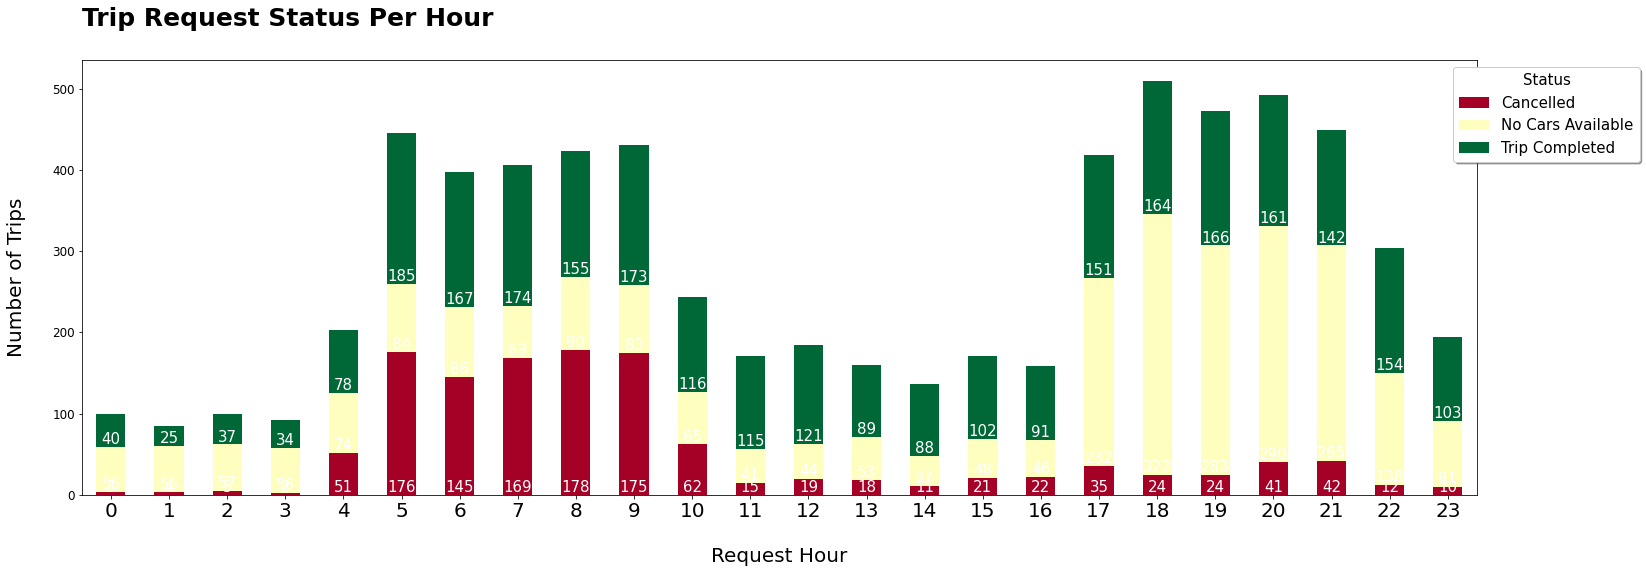

In [89]:
res = hour_requests_vs_status.plot(kind="bar",stacked=True,figsize=[25,8],colormap="RdYlGn",fontsize=12)
plt.title("Trip Request Status Per Hour\n",fontsize=25,fontweight="bold",loc="left")
plt.xlabel("\nRequest Hour",fontsize=20)
plt.setp(res.xaxis.get_majorticklabels(),fontsize=20,rotation=0)
plt.ylabel("Number of Trips\n",fontsize=20)
plt.setp(res.xaxis.get_majorticklabels(),fontsize=20)
plt.legend(title='Status',title_fontsize=15,loc='upper center', bbox_to_anchor=(1.05, 1), shadow=True, ncol=1, labels=["Cancelled","No Cars Available","Trip Completed"],fontsize=15)
for p in res.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    res.text(x+width/2,
             (y),
             '{:.0f}'.format(height),
             horizontalalignment='center',
             verticalalignment='bottom',fontsize=15,color="w")
plt.show()

In [90]:
data["Distance_estimate"]=pd.NA

In [91]:
data["Distance_estimate"][data.time_duration<30] = "01 Closest"
data["Distance_estimate"][(data.time_duration>=30) & (data.time_duration<45)] = "02 Near"
data["Distance_estimate"][(data.time_duration>=45) & (data.time_duration<60)] = "03 Far"
data["Distance_estimate"][(data.time_duration>=60)] = "04 Farthest"

In [92]:
data["Distance_estimate"].value_counts(dropna=False)

<NA>           3914
04 Farthest     942
03 Far          938
02 Near         841
01 Closest      110
Name: Distance_estimate, dtype: int64

In [93]:
pd.pivot_table(data=data,index="Pickup point",columns="Distance_estimate",values="Request id",aggfunc="count")

Distance_estimate,01 Closest,02 Near,03 Far,04 Farthest
Pickup point,,,,
Airport,49,409,436,433
City,61,432,502,509


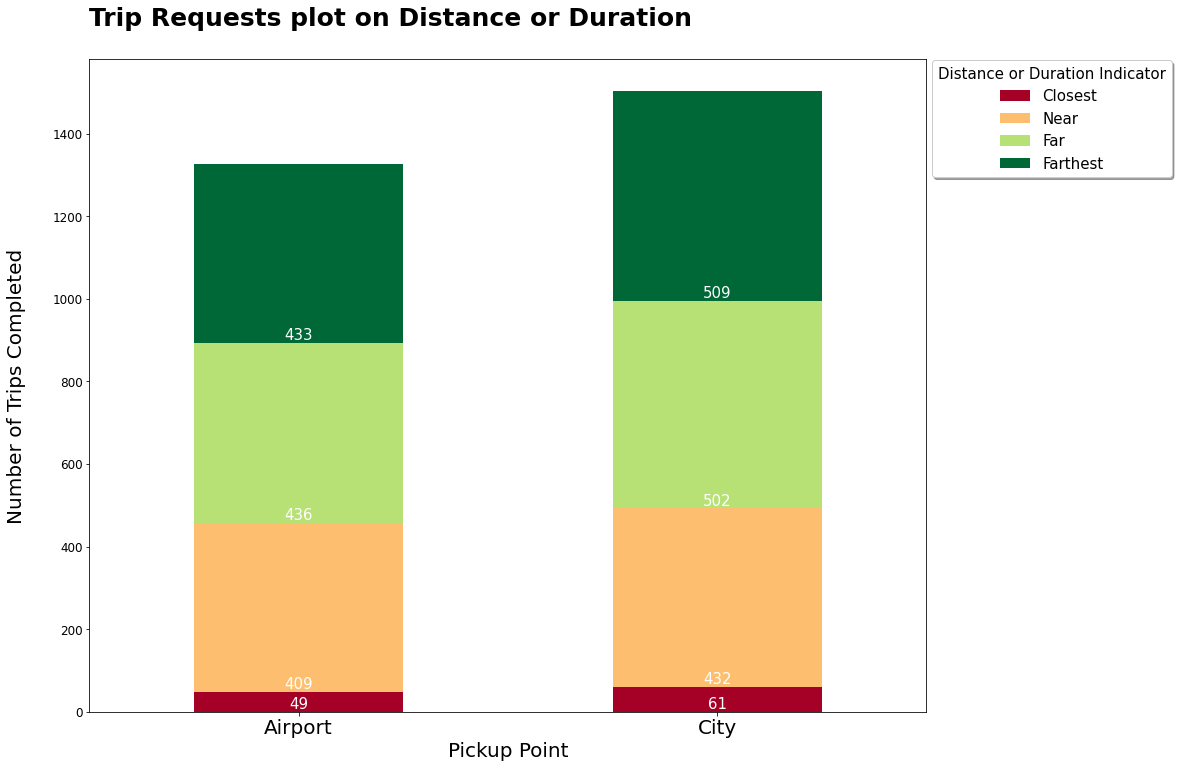

In [94]:
res = pd.pivot_table(data=data,index="Pickup point",columns="Distance_estimate",values="Request id",aggfunc="count").plot(kind="bar",figsize=[15,12],stacked=True,colormap="RdYlGn",fontsize=12)
plt.title("Trip Requests plot on Distance or Duration\n",fontsize=25,fontweight="bold",loc="left")
plt.xlabel("Pickup Point",fontsize=20)
plt.setp(res.xaxis.get_majorticklabels(),fontsize=20,rotation=0)
plt.ylabel("Number of Trips Completed\n",fontsize=20)
plt.setp(res.xaxis.get_majorticklabels(),fontsize=20)
plt.legend(title='Distance or Duration Indicator',title_fontsize=15,loc='upper center', bbox_to_anchor=(1.15, 1.01), shadow=True, ncol=1, labels=["Closest","Near","Far","Farthest"],fontsize=15)
for p in res.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    res.text(x+width/2,
             (y),
             '{:.0f}'.format(height),
             horizontalalignment='center',
             verticalalignment='bottom',fontsize=15,color="w")
plt.show()

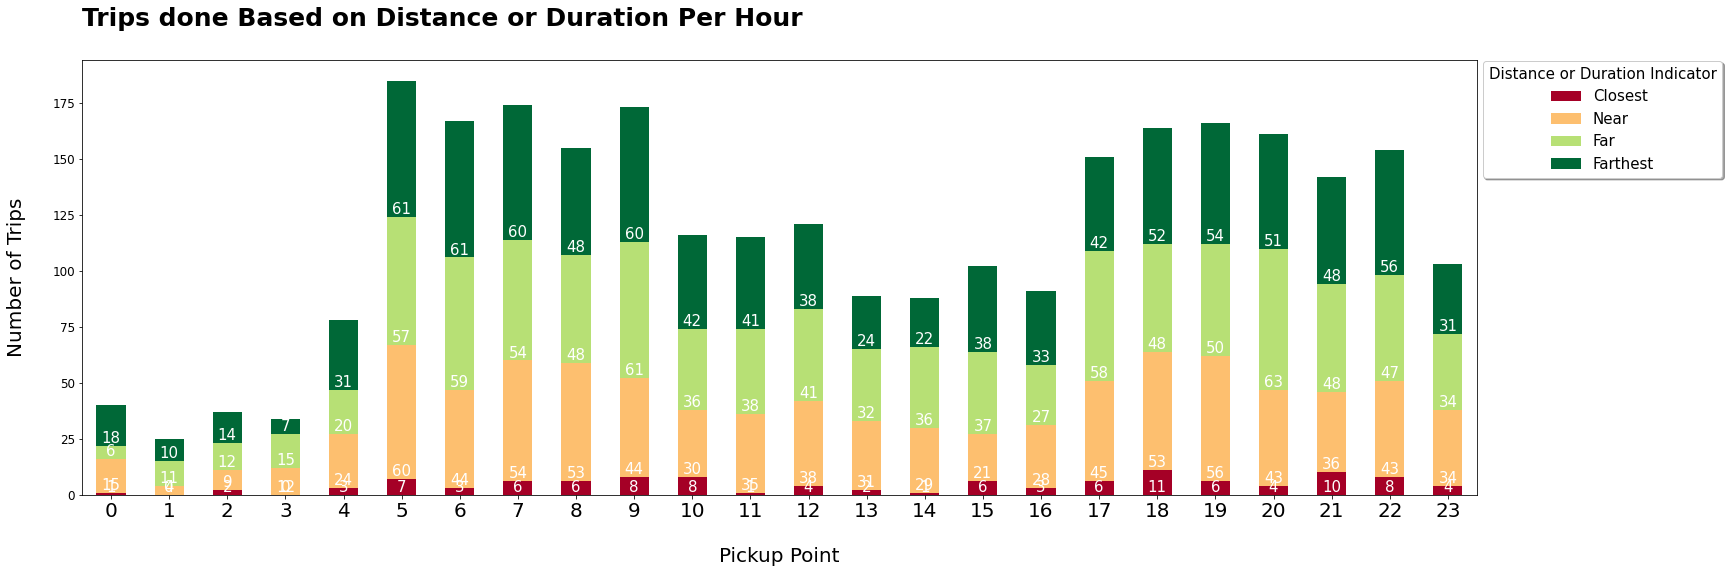

In [95]:
res = pd.pivot_table(data=data[~data.time_duration.isna()],index="Rhour",columns="Distance_estimate",values="Request id",aggfunc="count").plot(kind="bar",figsize=[25,8],stacked=True,colormap="RdYlGn",fontsize=12)
plt.title("Trips done Based on Distance or Duration Per Hour\n",fontsize=25,fontweight="bold",loc="left")
plt.xlabel("\nPickup Point",fontsize=20)
plt.setp(res.xaxis.get_majorticklabels(),fontsize=20,rotation=0)
plt.ylabel("Number of Trips\n",fontsize=20)
plt.setp(res.xaxis.get_majorticklabels(),fontsize=20)
plt.legend(title='Distance or Duration Indicator',title_fontsize=15,loc='upper center', bbox_to_anchor=(1.09, 1.015), shadow=True, ncol=1, labels=["Closest","Near","Far","Farthest"],fontsize=15)
for p in res.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    res.text(x+width/2,
             (y),
             '{:.0f}'.format(height),
             horizontalalignment='center',
             verticalalignment='bottom',fontsize=15,color="w")
plt.show()

In [96]:
pd.pivot_table(data=data[~data.time_duration.isna()],index="Rhour",columns="Distance_estimate",values="Request id",aggfunc="count").describe()

Distance_estimate,01 Closest,02 Near,03 Far,04 Farthest
count,22.00000,24.000000,24.000000,24.000000
mean,5.00000,35.041667,39.083333,39.250000
std,2.91139,15.442683,16.916461,16.772778
min,1.00000,4.000000,6.000000,7.000000
25%,3.00000,27.000000,30.750000,29.250000
50%,5.00000,35.500000,39.500000,41.500000
75%,6.75000,44.250000,51.000000,52.500000
max,11.00000,60.000000,63.000000,61.000000


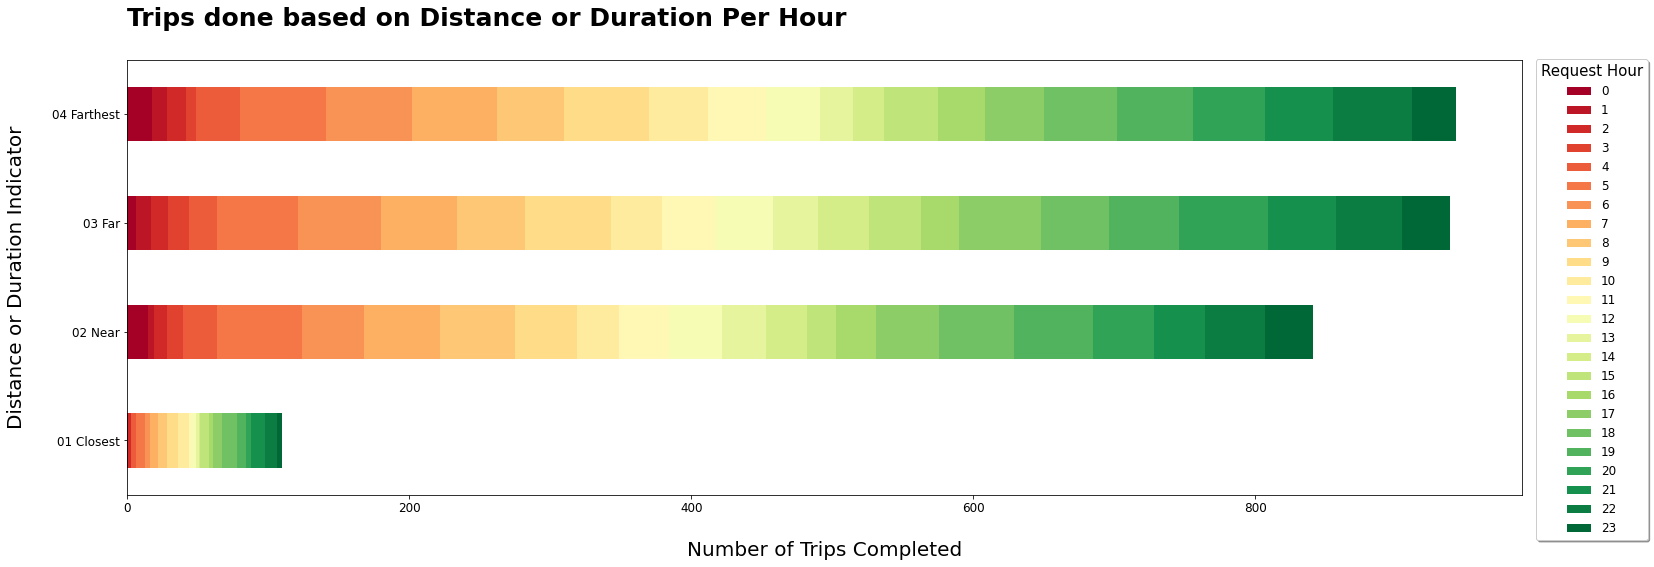

In [97]:
ans = pd.pivot_table(data=data[~data.time_duration.isna()],index="Distance_estimate",columns="Rhour",values="Request id",aggfunc="count").plot(kind="barh",figsize=[25,8],stacked=True,colormap="RdYlGn",fontsize=12)
plt.title("Trips done based on Distance or Duration Per Hour\n",fontsize=25,fontweight="bold",loc="left")
plt.xlabel("\nNumber of Trips Completed",fontsize=20)
plt.setp(res.xaxis.get_majorticklabels(),fontsize=20,rotation=0)
plt.ylabel("Distance or Duration Indicator\n",fontsize=20)
plt.setp(res.xaxis.get_majorticklabels(),fontsize=20)
plt.legend(title='Request Hour',title_fontsize=15,loc='upper center', bbox_to_anchor=(1.05, 1.015), shadow=True, ncol=1, labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],fontsize=12)

plt.show()

In [98]:
data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,RYear,RMonth,DYear,DMonth,...,trip_same_day,Rdate,Rday,Ddate,Dday,Time,time_period,Rhour,Dhour,Distance_estimate
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016,7,2016,7,...,Y,2016-07-11,Monday,2016-07-11,Monday,11:51:00,Morning,11,13.0,04 Farthest
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016,7,2016,7,...,Y,2016-07-11,Monday,2016-07-11,Monday,17:57:00,Early Sunset,17,18.0,03 Far
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016,7,2016,7,...,Y,2016-07-12,Tuesday,2016-07-12,Tuesday,09:17:00,Morning,9,9.0,02 Near
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016,7,2016,7,...,Y,2016-07-12,Tuesday,2016-07-12,Tuesday,21:08:00,Night,21,22.0,03 Far
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016,7,2016,7,...,Y,2016-07-13,Wednesday,2016-07-13,Wednesday,08:33:16,Morning,8,9.0,03 Far


In [99]:
data["same"] = pd.NA
data["same"][data.Rhour == data.Dhour] = "Yes"
data["same"][~(data.Rhour == data.Dhour)] = "No"
data["same"].value_counts(dropna=False)

No     6260
Yes     485
Name: same, dtype: int64

In [100]:
pd.pivot_table(data=data,index=["Rhour"],columns=["Pickup point","same"],values="Request id",aggfunc="count")

Pickup point Airport     City    
same              No Yes   No Yes
Rhour                            
0                 46   7   40   6
1                 40   2   39   4
2                 40   1   54   4
3                 42   3   42   5
4                 69   3  129   2
5                 78  14  339  14
6                 77  12  296  13
7                 67  16  310  13
8                 59  14  335  15
9                 78  11  327  15
10                64  11  152  16
11                58   6   95  12
12                80   7   84  13
13                57   8   85  10
14                42   8   79   7
15                68   8   89   6
16                54   7   90   8
17               298  10   99  11
18               387  18   90  15
19               353  13   87  20
20               363  15  101  13
21               332  11   91  15
22               169  14  106  15
23                90   8   90   6

In [101]:
data[(data.same=="Yes")]

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,RYear,RMonth,DYear,DMonth,...,Rdate,Rday,Ddate,Dday,Time,time_period,Rhour,Dhour,Distance_estimate,same
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016,7,2016,7,...,2016-07-12,Tuesday,2016-07-12,Tuesday,09:17:00,Morning,9,9.0,02 Near,Yes
11,1983,City,2.0,Trip Completed,2016-07-12 12:30:00,2016-07-12 12:57:00,2016,7,2016,7,...,2016-07-12,Tuesday,2016-07-12,Tuesday,12:30:00,Afternoon,12,12.0,01 Closest,Yes
16,4652,City,2.0,Trip Completed,2016-07-14 12:01:02,2016-07-14 12:36:46,2016,7,2016,7,...,2016-07-14,Thursday,2016-07-14,Thursday,12:01:02,Afternoon,12,12.0,02 Near,Yes
18,535,Airport,3.0,Trip Completed,2016-07-11 10:00:00,2016-07-11 10:31:00,2016,7,2016,7,...,2016-07-11,Monday,2016-07-11,Monday,10:00:00,Morning,10,10.0,02 Near,Yes
22,2211,Airport,3.0,Trip Completed,2016-07-12 18:00:00,2016-07-12 18:28:00,2016,7,2016,7,...,2016-07-12,Tuesday,2016-07-12,Tuesday,18:00:00,Evening,18,18.0,01 Closest,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2799,993,City,297.0,Trip Completed,2016-07-11 19:00:00,2016-07-11 19:41:00,2016,7,2016,7,...,2016-07-11,Monday,2016-07-11,Monday,19:00:00,Evening,19,19.0,02 Near,Yes
2809,2404,Airport,298.0,Trip Completed,2016-07-12 20:00:00,2016-07-12 20:56:00,2016,7,2016,7,...,2016-07-12,Tuesday,2016-07-12,Tuesday,20:00:00,Night,20,20.0,03 Far,Yes
2810,3313,City,298.0,Trip Completed,2016-07-13 12:01:34,2016-07-13 12:55:12,2016,7,2016,7,...,2016-07-13,Wednesday,2016-07-13,Wednesday,12:01:34,Afternoon,12,12.0,03 Far,Yes
2818,6271,City,298.0,Trip Completed,2016-07-15 18:14:56,2016-07-15 18:59:11,2016,7,2016,7,...,2016-07-15,Friday,2016-07-15,Friday,18:14:56,Evening,18,18.0,02 Near,Yes


In [102]:
sorted_data[sorted_data.Waiting=="Waiting"]

,Request id,Driver id,Driver_id_next,Pickup point,Pickup_point_next,Request timestamp,Request_timestamp_next,time_duration,time_next,time_period,time_period_next,Rhour,Rhour_next,Rday,Rday_next,Rdate,Rdate_next,Waiting
1,867,1.0,1.0,Airport,City,2016-07-11 17:57:00,2016-07-12 09:17:00,50.0,41.0,Early Sunset,Morning,17,9,Monday,Tuesday,2016-07-11,2016-07-12,Waiting
2,1807,1.0,1.0,City,Airport,2016-07-12 09:17:00,2016-07-12 21:08:00,41.0,55.0,Morning,Night,9,21,Tuesday,Tuesday,2016-07-12,2016-07-12,Waiting
3,2532,1.0,1.0,Airport,City,2016-07-12 21:08:00,2016-07-13 08:33:16,55.0,52.516667,Night,Morning,21,8,Tuesday,Wednesday,2016-07-12,2016-07-13,Waiting
4,3112,1.0,1.0,City,Airport,2016-07-13 08:33:16,2016-07-13 21:57:28,52.516667,31.516667,Morning,Night,8,21,Wednesday,Wednesday,2016-07-13,2016-07-13,Waiting
7,5510,1.0,1.0,Airport,City,2016-07-15 05:11:52,2016-07-15 17:57:27,56.0,53.4,Early Rise,Early Sunset,5,17,Friday,Friday,2016-07-15,2016-07-15,Waiting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,101,99.0,99.0,Airport,City,2016-07-11 05:08:00,2016-07-11 07:53:00,61.0,62.0,Early Rise,Morning,5,7,Monday,Monday,2016-07-11,2016-07-11,Waiting
959,871,99.0,99.0,City,Airport,2016-07-11 17:57:00,2016-07-11 23:11:00,45.0,63.0,Early Sunset,Night,17,23,Monday,Monday,2016-07-11,2016-07-11,Waiting
961,3227,99.0,99.0,Airport,City,2016-07-13 09:52:49,2016-07-14 18:14:26,40.816667,65.866667,Morning,Evening,9,18,Wednesday,Thursday,2016-07-13,2016-07-14,Waiting
963,5373,99.0,99.0,City,Airport,2016-07-14 23:42:23,2016-07-15 21:49:41,35.016667,38.95,Night,Night,23,21,Thursday,Friday,2016-07-14,2016-07-15,Waiting


In [103]:
uber_data = data.merge(sorted_data,on="Request id",how="left")

In [104]:
uber_data

,Request id,Pickup point_x,Driver id_x,Status,Request timestamp_x,Drop timestamp,RYear,RMonth,DYear,DMonth,...,time_next,time_period_y,time_period_next,Rhour_y,Rhour_next,Rday_y,Rday_next,Rdate_y,Rdate_next,Waiting
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016,7,2016,7,...,50.0,Morning,Early Sunset,11.0,17,Monday,Monday,2016-07-11,2016-07-11,0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016,7,2016,7,...,41.0,Early Sunset,Morning,17.0,9,Monday,Tuesday,2016-07-11,2016-07-12,Waiting
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016,7,2016,7,...,55.0,Morning,Night,9.0,21,Tuesday,Tuesday,2016-07-12,2016-07-12,Waiting
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016,7,2016,7,...,52.516667,Night,Morning,21.0,8,Tuesday,Wednesday,2016-07-12,2016-07-13,Waiting
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016,7,2016,7,...,31.516667,Morning,Night,8.0,21,Wednesday,Wednesday,2016-07-13,2016-07-13,Waiting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,<NA>,No Cars Available,2016-07-15 23:49:03,NaT,2016,7,<NA>,<NA>,...,<NA>,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN
6741,6752,Airport,<NA>,No Cars Available,2016-07-15 23:50:05,NaT,2016,7,<NA>,<NA>,...,<NA>,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN
6742,6751,City,<NA>,No Cars Available,2016-07-15 23:52:06,NaT,2016,7,<NA>,<NA>,...,<NA>,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN
6743,6754,City,<NA>,No Cars Available,2016-07-15 23:54:39,NaT,2016,7,<NA>,<NA>,...,<NA>,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN


In [105]:
pd.DataFrame(uber_data.columns.sort_values())

,0
0,DMonth
1,DYear
2,Ddate
3,Dday
4,Dhour
5,Distance_estimate
6,Driver id_x
7,Driver id_y
8,Driver_id_next
9,Drop timestamp


In [106]:
uber_data[[x for x in uber_data.columns.sort_values().to_list() if x.endswith(("_x"))]]

,Driver id_x,Pickup point_x,Rdate_x,Rday_x,Request timestamp_x,Rhour_x,time_duration_x,time_period_x
0,1.0,Airport,2016-07-11,Monday,2016-07-11 11:51:00,11,69.0,Morning
1,1.0,Airport,2016-07-11,Monday,2016-07-11 17:57:00,17,50.0,Early Sunset
2,1.0,City,2016-07-12,Tuesday,2016-07-12 09:17:00,9,41.0,Morning
3,1.0,Airport,2016-07-12,Tuesday,2016-07-12 21:08:00,21,55.0,Night
4,1.0,City,2016-07-13,Wednesday,2016-07-13 08:33:16,8,52.516667,Morning
...,...,...,...,...,...,...,...,...
6740,<NA>,City,2016-07-15,Friday,2016-07-15 23:49:03,23,<NA>,Night
6741,<NA>,Airport,2016-07-15,Friday,2016-07-15 23:50:05,23,<NA>,Night
6742,<NA>,City,2016-07-15,Friday,2016-07-15 23:52:06,23,<NA>,Night
6743,<NA>,City,2016-07-15,Friday,2016-07-15 23:54:39,23,<NA>,Night


In [107]:
uber_data = uber_data[[x for x in uber_data.columns.to_list() if not x.endswith(("_x","_y"))] + [x for x in uber_data.columns.to_list() if x.endswith(("_x"))]]

In [108]:
uber_data

,Request id,Status,Drop timestamp,RYear,RMonth,DYear,DMonth,trip_same_day,Ddate,Dday,...,Rdate_next,Waiting,Pickup point_x,Driver id_x,Request timestamp_x,time_duration_x,Rdate_x,Rday_x,time_period_x,Rhour_x
0,619,Trip Completed,2016-07-11 13:00:00,2016,7,2016,7,Y,2016-07-11,Monday,...,2016-07-11,0,Airport,1.0,2016-07-11 11:51:00,69.0,2016-07-11,Monday,Morning,11
1,867,Trip Completed,2016-07-11 18:47:00,2016,7,2016,7,Y,2016-07-11,Monday,...,2016-07-12,Waiting,Airport,1.0,2016-07-11 17:57:00,50.0,2016-07-11,Monday,Early Sunset,17
2,1807,Trip Completed,2016-07-12 09:58:00,2016,7,2016,7,Y,2016-07-12,Tuesday,...,2016-07-12,Waiting,City,1.0,2016-07-12 09:17:00,41.0,2016-07-12,Tuesday,Morning,9
3,2532,Trip Completed,2016-07-12 22:03:00,2016,7,2016,7,Y,2016-07-12,Tuesday,...,2016-07-13,Waiting,Airport,1.0,2016-07-12 21:08:00,55.0,2016-07-12,Tuesday,Night,21
4,3112,Trip Completed,2016-07-13 09:25:47,2016,7,2016,7,Y,2016-07-13,Wednesday,...,2016-07-13,Waiting,City,1.0,2016-07-13 08:33:16,52.516667,2016-07-13,Wednesday,Morning,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6740,6745,No Cars Available,NaT,2016,7,<NA>,<NA>,N,NaT,NaN,...,NaN,NaN,City,<NA>,2016-07-15 23:49:03,<NA>,2016-07-15,Friday,Night,23
6741,6752,No Cars Available,NaT,2016,7,<NA>,<NA>,N,NaT,NaN,...,NaN,NaN,Airport,<NA>,2016-07-15 23:50:05,<NA>,2016-07-15,Friday,Night,23
6742,6751,No Cars Available,NaT,2016,7,<NA>,<NA>,N,NaT,NaN,...,NaN,NaN,City,<NA>,2016-07-15 23:52:06,<NA>,2016-07-15,Friday,Night,23
6743,6754,No Cars Available,NaT,2016,7,<NA>,<NA>,N,NaT,NaN,...,NaN,NaN,City,<NA>,2016-07-15 23:54:39,<NA>,2016-07-15,Friday,Night,23


In [109]:
for col in uber_data.columns.to_list():
    if col.endswith("_x"):
        print(col,col[0:-2])
        uber_data.rename(columns={col:col[0:-2]},inplace=True)

Pickup point_x Pickup point
Driver id_x Driver id
Request timestamp_x Request timestamp
time_duration_x time_duration
Rdate_x Rdate
Rday_x Rday
time_period_x time_period
Rhour_x Rhour


In [110]:
uber_data

,Request id,Status,Drop timestamp,RYear,RMonth,DYear,DMonth,trip_same_day,Ddate,Dday,...,Rdate_next,Waiting,Pickup point,Driver id,Request timestamp,time_duration,Rdate,Rday,time_period,Rhour
0,619,Trip Completed,2016-07-11 13:00:00,2016,7,2016,7,Y,2016-07-11,Monday,...,2016-07-11,0,Airport,1.0,2016-07-11 11:51:00,69.0,2016-07-11,Monday,Morning,11
1,867,Trip Completed,2016-07-11 18:47:00,2016,7,2016,7,Y,2016-07-11,Monday,...,2016-07-12,Waiting,Airport,1.0,2016-07-11 17:57:00,50.0,2016-07-11,Monday,Early Sunset,17
2,1807,Trip Completed,2016-07-12 09:58:00,2016,7,2016,7,Y,2016-07-12,Tuesday,...,2016-07-12,Waiting,City,1.0,2016-07-12 09:17:00,41.0,2016-07-12,Tuesday,Morning,9
3,2532,Trip Completed,2016-07-12 22:03:00,2016,7,2016,7,Y,2016-07-12,Tuesday,...,2016-07-13,Waiting,Airport,1.0,2016-07-12 21:08:00,55.0,2016-07-12,Tuesday,Night,21
4,3112,Trip Completed,2016-07-13 09:25:47,2016,7,2016,7,Y,2016-07-13,Wednesday,...,2016-07-13,Waiting,City,1.0,2016-07-13 08:33:16,52.516667,2016-07-13,Wednesday,Morning,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6740,6745,No Cars Available,NaT,2016,7,<NA>,<NA>,N,NaT,NaN,...,NaN,NaN,City,<NA>,2016-07-15 23:49:03,<NA>,2016-07-15,Friday,Night,23
6741,6752,No Cars Available,NaT,2016,7,<NA>,<NA>,N,NaT,NaN,...,NaN,NaN,Airport,<NA>,2016-07-15 23:50:05,<NA>,2016-07-15,Friday,Night,23
6742,6751,No Cars Available,NaT,2016,7,<NA>,<NA>,N,NaT,NaN,...,NaN,NaN,City,<NA>,2016-07-15 23:52:06,<NA>,2016-07-15,Friday,Night,23
6743,6754,No Cars Available,NaT,2016,7,<NA>,<NA>,N,NaT,NaN,...,NaN,NaN,City,<NA>,2016-07-15 23:54:39,<NA>,2016-07-15,Friday,Night,23


In [111]:
uber_data[(uber_data.same=="Yes") & (uber_data.Waiting == "Waiting")]

,Request id,Status,Drop timestamp,RYear,RMonth,DYear,DMonth,trip_same_day,Ddate,Dday,...,Rdate_next,Waiting,Pickup point,Driver id,Request timestamp,time_duration,Rdate,Rday,time_period,Rhour
2,1807,Trip Completed,2016-07-12 09:58:00,2016,7,2016,7,Y,2016-07-12,Tuesday,...,2016-07-12,Waiting,City,1.0,2016-07-12 09:17:00,41.0,2016-07-12,Tuesday,Morning,9
11,1983,Trip Completed,2016-07-12 12:57:00,2016,7,2016,7,Y,2016-07-12,Tuesday,...,2016-07-13,Waiting,City,2.0,2016-07-12 12:30:00,27.0,2016-07-12,Tuesday,Afternoon,12
16,4652,Trip Completed,2016-07-14 12:36:46,2016,7,2016,7,Y,2016-07-14,Thursday,...,2016-07-14,Waiting,City,2.0,2016-07-14 12:01:02,35.733333,2016-07-14,Thursday,Afternoon,12
27,5916,Trip Completed,2016-07-15 10:53:06,2016,7,2016,7,Y,2016-07-15,Friday,...,2016-07-11,Waiting,City,3.0,2016-07-15 10:00:43,52.383333,2016-07-15,Friday,Morning,10
28,669,Trip Completed,2016-07-11 13:49:00,2016,7,2016,7,Y,2016-07-11,Monday,...,2016-07-12,Waiting,City,4.0,2016-07-11 13:08:00,41.0,2016-07-11,Monday,Afternoon,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2797,30,Trip Completed,2016-07-11 02:37:00,2016,7,2016,7,Y,2016-07-11,Monday,...,2016-07-11,Waiting,Airport,297.0,2016-07-11 02:04:00,33.0,2016-07-11,Monday,Late Night,2
2799,993,Trip Completed,2016-07-11 19:41:00,2016,7,2016,7,Y,2016-07-11,Monday,...,2016-07-12,Waiting,City,297.0,2016-07-11 19:00:00,41.0,2016-07-11,Monday,Evening,19
2809,2404,Trip Completed,2016-07-12 20:56:00,2016,7,2016,7,Y,2016-07-12,Tuesday,...,2016-07-13,Waiting,Airport,298.0,2016-07-12 20:00:00,56.0,2016-07-12,Tuesday,Night,20
2818,6271,Trip Completed,2016-07-15 18:59:11,2016,7,2016,7,Y,2016-07-15,Friday,...,2016-07-11,Waiting,City,298.0,2016-07-15 18:14:56,44.25,2016-07-15,Friday,Evening,18


In [112]:
driver_cancel = uber_data[["Driver id","Request id"]][uber_data.Status=="Cancelled"].groupby(by="Driver id").count()
driver_cancel["Driver id"] = driver_cancel.index
driver_cancel.head()
driver_cancel.reset_index(drop=True, inplace=True)
driver_cancel.head()
driver_cancel["Driver id"] = driver_cancel["Driver id"].str[0:-2]
driver_cancel["Driver id"] = driver_cancel["Driver id"].astype(int)

<AxesSubplot:ylabel='Frequency'>

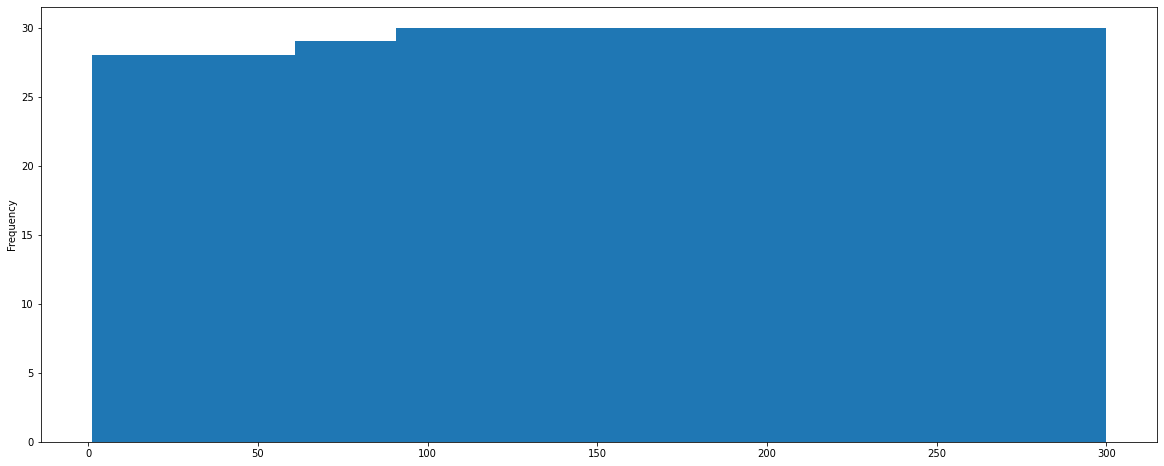

In [113]:
plt.figure(figsize=[20,8])
driver_cancel["Driver id"].plot(kind="hist")

In [114]:
driver_cancel["Request id"].describe()

count    295.000000
mean       4.284746
std        1.937880
min        1.000000
25%        3.000000
50%        4.000000
75%        5.500000
max       12.000000
Name: Request id, dtype: float64

In [115]:
sd_gap_Airport = pd.pivot_table(data=uber_data[uber_data["Pickup point"]=="Airport"],index="time_period",columns="Status",values="Request id",aggfunc="count",margins=True,margins_name="TotalRequests")
sd_gap_Airport.head()
sd_gap_Airport["Failed"] = sd_gap_Airport["Cancelled"] + sd_gap_Airport["No Cars Available"]
sd_gap_Airport.head()
sd_gap_Airport.drop(columns=["Cancelled","No Cars Available"],inplace=True)
sd_gap_Airport.head()
sd_gap_Airport["%Successful"] = 100*sd_gap_Airport["Trip Completed"]/sd_gap_Airport.TotalRequests
sd_gap_Airport["%Failed"] = 100*sd_gap_Airport["Failed"]/sd_gap_Airport.TotalRequests
sd_gap_Airport.drop(columns=["Trip Completed","TotalRequests","Failed"],inplace=True)
sd_gap_Airport.head()

Status,%Successful,%Failed
time_period,,
Afternoon,67.266187,32.733813
Early Rise,79.841897,20.158103
Early Sunset,30.352304,69.647696
Evening,21.271077,78.728923
Late Night,37.016575,NaN


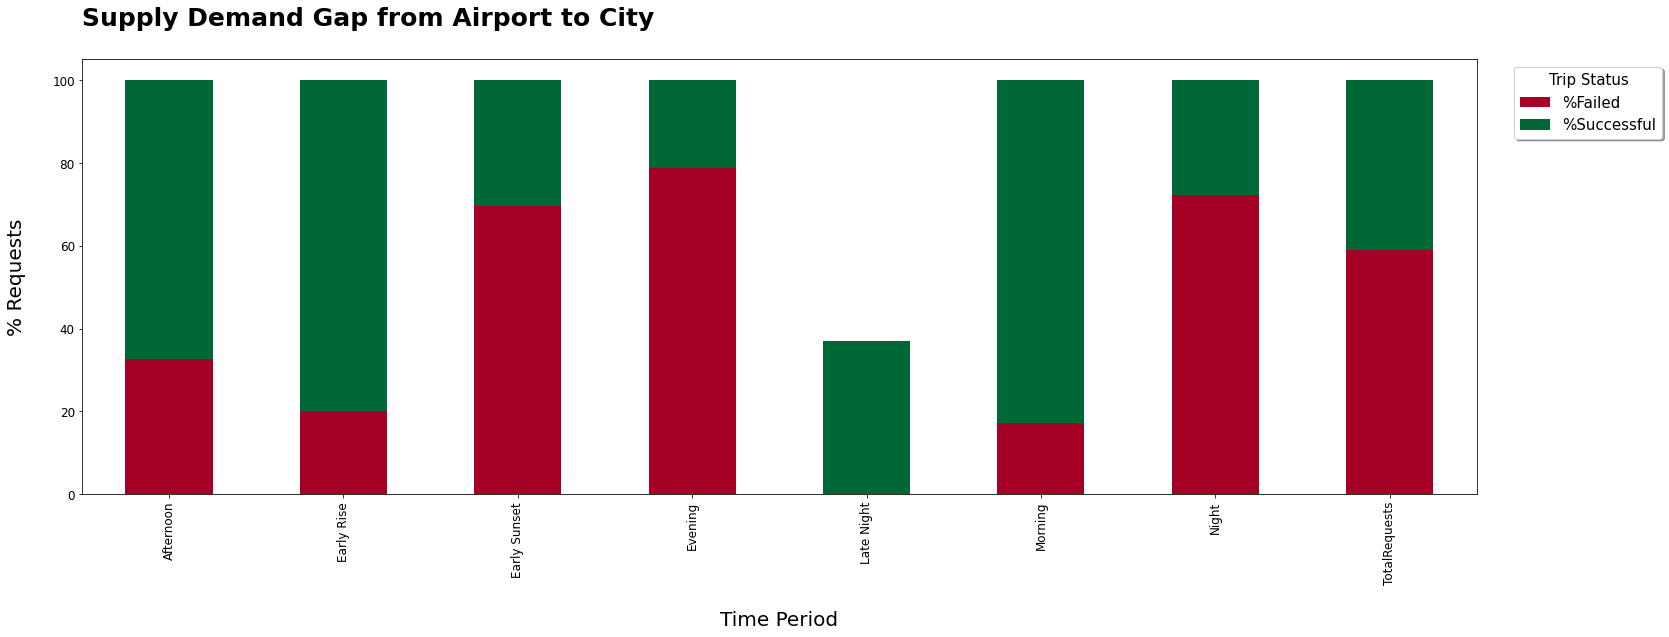

In [116]:
ans= sd_gap_Airport[["%Failed","%Successful"]].plot(kind="bar",figsize=[25,8],stacked=True,colormap="RdYlGn",fontsize=12)
res.set_facecolor('lightgray')
plt.title("Supply Demand Gap from Airport to City\n",fontsize=25,fontweight="bold",loc="left")
plt.xlabel("\nTime Period",fontsize=20)
plt.setp(res.xaxis.get_majorticklabels(),fontsize=20,rotation=0)
plt.ylabel("% Requests\n",fontsize=20)
plt.setp(res.yaxis.get_majorticklabels(),fontsize=20)
plt.legend(title='Trip Status',title_fontsize=15,loc='upper center', bbox_to_anchor=(1.08, 1), shadow=True, ncol=1, labels=["%Failed","%Successful"],fontsize=15)
plt.show()

In [117]:
sd_gap_City = pd.pivot_table(data=uber_data[uber_data["Pickup point"]=="City"],index="time_period",columns="Status",values="Request id",aggfunc="count",margins=True,margins_name="TotalRequests")
sd_gap_City.head()
sd_gap_City["Failed"] = sd_gap_City["Cancelled"] + sd_gap_City["No Cars Available"]
sd_gap_City.head()
sd_gap_City.drop(columns=["Cancelled","No Cars Available"],inplace=True)
sd_gap_City.head()
sd_gap_City["%Successful"] = 100*sd_gap_City["Trip Completed"]/sd_gap_City.TotalRequests
sd_gap_City["%Failed"] = 100*sd_gap_City["Failed"]/sd_gap_City.TotalRequests
sd_gap_City.drop(columns=["Trip Completed","TotalRequests","Failed"],inplace=True)
sd_gap_City.head()

Status,%Successful,%Failed
time_period,,
Afternoon,57.104558,42.895442
Early Rise,28.751576,71.248424
Early Sunset,62.500000,37.500000
Evening,78.301887,21.698113
Late Night,35.567010,64.432990


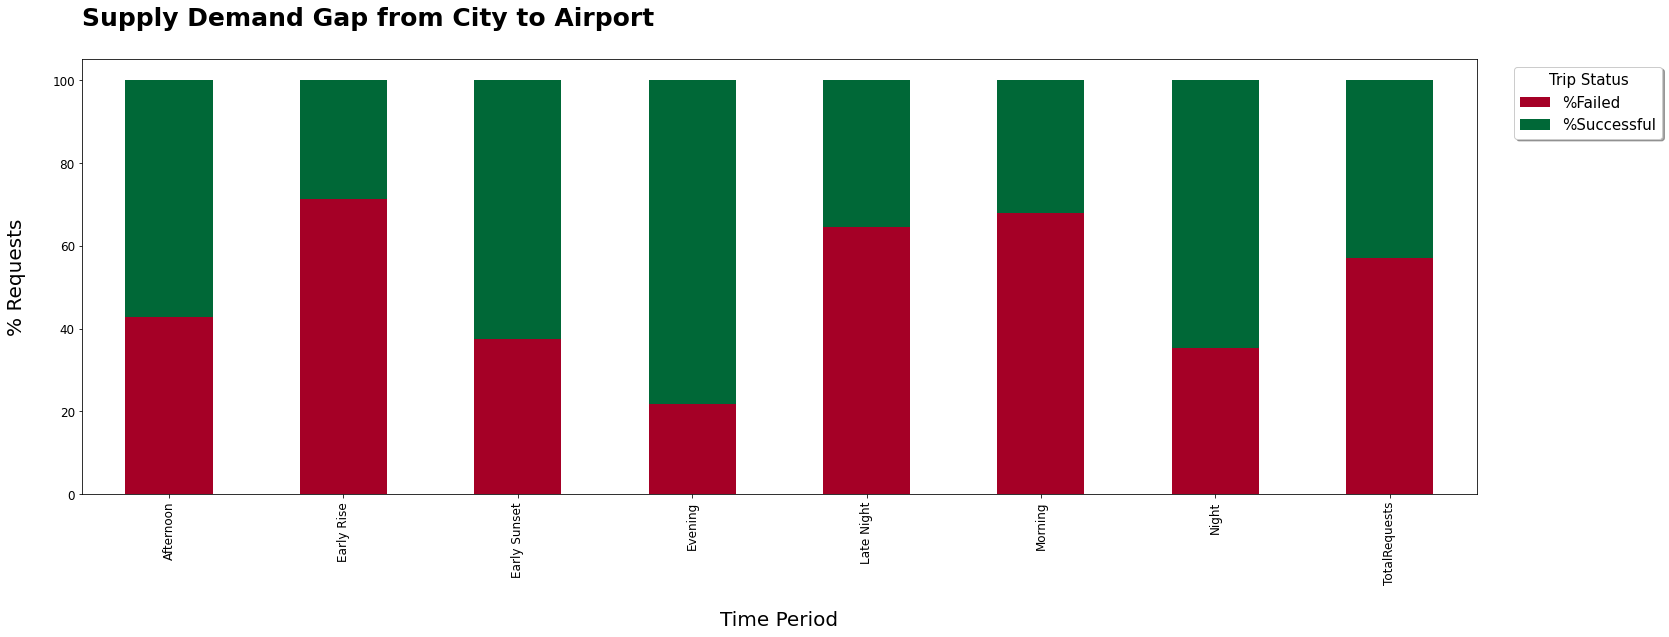

In [118]:
result = sd_gap_City[["%Failed","%Successful"]].plot(kind="bar",figsize=[25,8],stacked=True,colormap="RdYlGn",fontsize=12)
res.set_facecolor('white')
plt.title("Supply Demand Gap from City to Airport\n",fontsize=25,fontweight="bold",loc="left")
plt.xlabel("\nTime Period",fontsize=20)
plt.setp(res.xaxis.get_majorticklabels(),fontsize=20,rotation=0)
plt.ylabel("% Requests\n",fontsize=20)
plt.setp(res.yaxis.get_majorticklabels(),fontsize=20)
plt.legend(title='Trip Status',title_fontsize=15,loc='upper center', bbox_to_anchor=(1.08, 1), shadow=True, ncol=1, labels=["%Failed","%Successful"],fontsize=15)
plt.show()

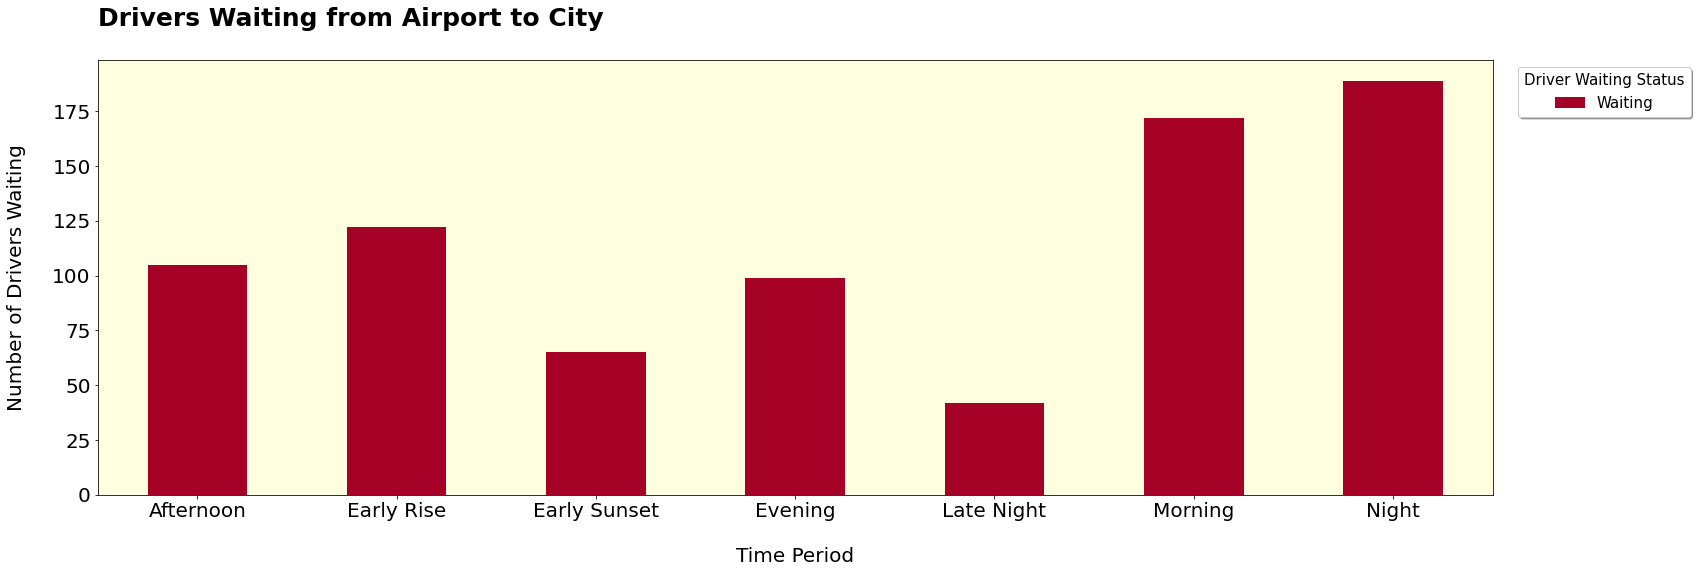

In [119]:
pd.pivot_table(data=uber_data[(uber_data["Pickup point"]=="Airport") & (uber_data["Waiting"]=="Waiting")],index="time_period",columns="Waiting",values="Driver id",aggfunc="count")
res = pd.pivot_table(data=uber_data[(uber_data["Pickup point"]=="Airport") & (uber_data["Waiting"]=="Waiting")],index="time_period",columns="Waiting",values="Driver id",aggfunc="count").plot(kind="bar",figsize=[25,8],stacked=True,colormap="RdYlGn",fontsize=12)
res.set_facecolor('lightyellow')
plt.title("Drivers Waiting from Airport to City\n",fontsize=25,fontweight="bold",loc="left")
plt.xlabel("\nTime Period",fontsize=20)
plt.setp(res.xaxis.get_majorticklabels(),fontsize=20,rotation=0)
plt.ylabel("Number of Drivers Waiting\n",fontsize=20)
plt.setp(res.yaxis.get_majorticklabels(),fontsize=20)
plt.legend(title='Driver Waiting Status',title_fontsize=15,loc='upper center', bbox_to_anchor=(1.08, 1), shadow=True, ncol=1, labels=["Waiting"],fontsize=15)
plt.show()

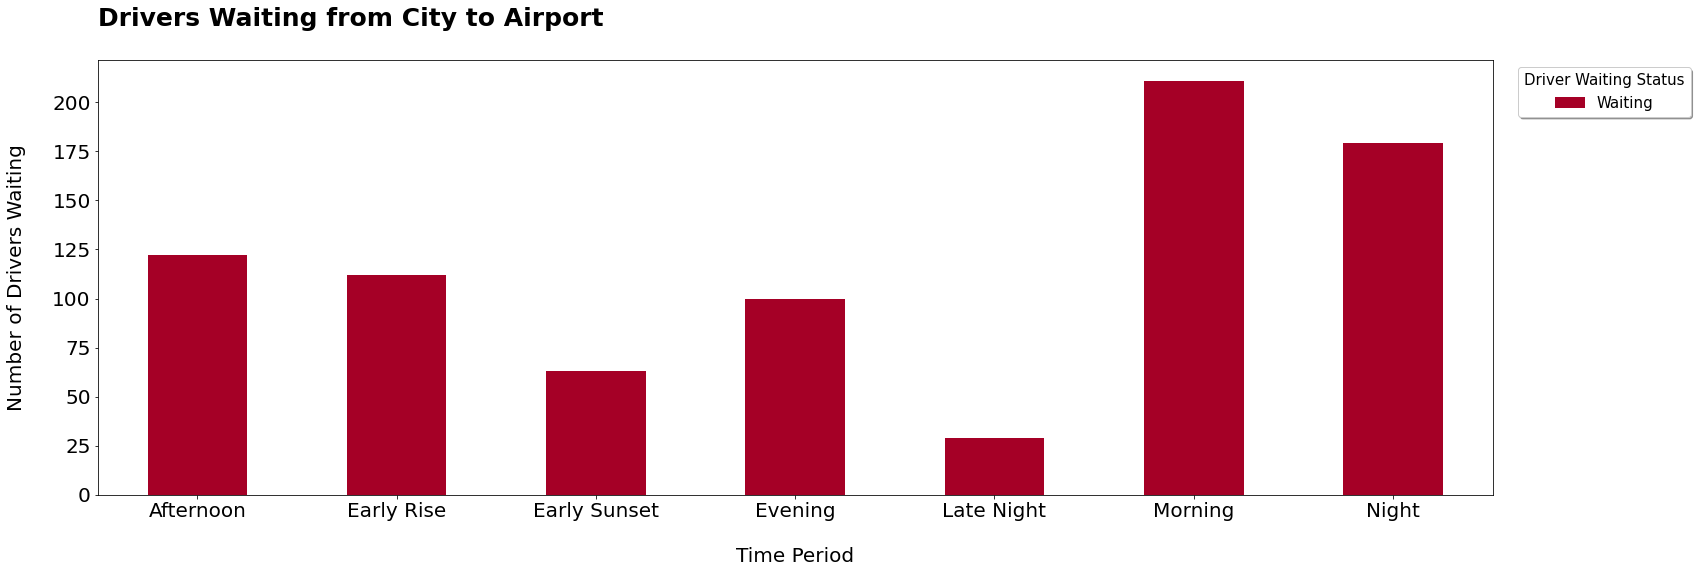

In [120]:
pd.pivot_table(data=uber_data[(uber_data["Pickup point"]=="City") & (uber_data["Waiting"]=="Waiting")],index="time_period",columns="Waiting",values="Driver id",aggfunc="count")
res = pd.pivot_table(data=uber_data[(uber_data["Pickup point"]=="City") & (uber_data["Waiting"]=="Waiting")],index="time_period",columns="Waiting",values="Driver id",aggfunc="count").plot(kind="bar",figsize=[25,8],stacked=True,colormap="RdYlGn",fontsize=12)
res.set_facecolor('white')
plt.title("Drivers Waiting from City to Airport\n",fontsize=25,fontweight="bold",loc="left")
plt.xlabel("\nTime Period",fontsize=20)
plt.setp(res.xaxis.get_majorticklabels(),fontsize=20,rotation=0)
plt.ylabel("Number of Drivers Waiting\n",fontsize=20)
plt.setp(res.yaxis.get_majorticklabels(),fontsize=20)
plt.legend(title='Driver Waiting Status',title_fontsize=15,loc='upper center', bbox_to_anchor=(1.08, 1), shadow=True, ncol=1, labels=["Waiting"],fontsize=15)
plt.show()

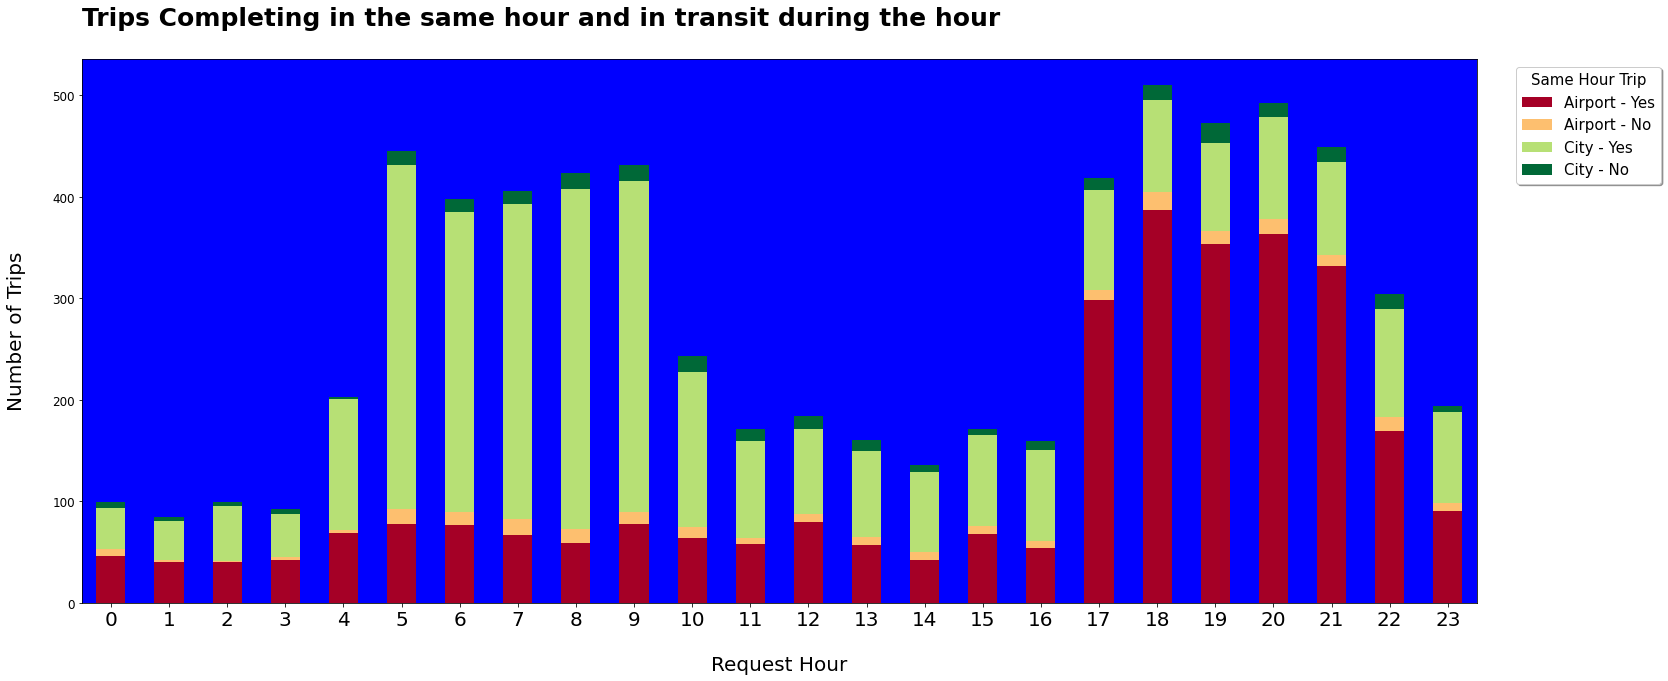

In [121]:
res=pd.pivot_table(data=data,index=["Rhour"],columns=["Pickup point","same"],values="Request id",aggfunc="count").plot(kind="bar",figsize=[25,10],stacked=True,colormap="RdYlGn",fontsize=12)
res.set_facecolor('blue')
plt.title("Trips Completing in the same hour and in transit during the hour\n",fontsize=25,fontweight="bold",loc="left")
plt.xlabel("\nRequest Hour",fontsize=20)
plt.setp(res.xaxis.get_majorticklabels(),fontsize=12,rotation=0)
plt.ylabel("Number of Trips\n",fontsize=20)
plt.setp(res.xaxis.get_majorticklabels(),fontsize=20)
plt.legend(title='Same Hour Trip',title_fontsize=15,loc='upper center', bbox_to_anchor=(1.08, 1), shadow=True, ncol=1, labels=["Airport - Yes","Airport - No", "City - Yes","City - No"],fontsize=15)
plt.show()